### Import libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

### Import dependencies

The collected data contains the parameters of jobs placed in the supercomputer from June to November 2022.

In [2]:
#data_jobinfo = pd.read_csv('slurm_jobinfo.csv')
#data_jobinfo_acct = pd.read_csv('slurm_jobinfo_acct.csv')

# the scheduler data from two systems with suffixes _sacct and _scontrol
data = pd.read_csv('data.csv')

# areas dictionary
areas = pd.read_csv('areas.csv')
areas = areas.rename(columns={'GroupID': 'Group'})

# merging frames
data = data.merge(areas, how = 'left', on = 'Group')

data.head()

C:\Users\Kseniya\AppData\Local\Temp\ipykernel_12488\1047924332.py:5: DtypeWarning: Columns (47,61,62,74,80,103,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv')


Unnamed: 0    JobID                        JobName_scontrol  \
0           0  2021931  0031_EVPFI_linear_model_part4_467_1.js   
1           1  2021932  0031_EVPFI_linear_model_part4_468_1.js   
2           2  2021933  0031_EVPFI_linear_model_part4_469_1.js   
3           3  2021934  0031_EVPFI_linear_model_part4_470_1.js   
4           4  2021935  0031_EVPFI_linear_model_part4_471_1.js   

  UserID_scontrol  GroupID_scontrol  MCS_label  Priority_scontrol  Nice  \
0   gramsn(50619)  geovation(50218)        NaN               3470     0   
1   gramsn(50619)  geovation(50218)        NaN               3470     0   
2   gramsn(50619)  geovation(50218)        NaN               3470     0   
3   gramsn(50619)  geovation(50218)        NaN               3470     0   
4   gramsn(50619)  geovation(50218)        NaN               3470     0   

  Account_scontrol QOS_scontrol  ...  \
0          g2admin     contract  ...   
1          g2admin     contract  ...   
2          g2admin     contract  ...   
3          g2admin     contract  ...   
4          g2admin     contract  ...   

                                TRESUsageOutMinNode    TRESUsageOutMinTask  \
0  energy=n01p143,fs/disk=n01p143,fs/lustre=n01p143  fs/disk=0,fs/lustre=0   
1  energy=n01p152,fs/disk=n01p152,fs/lustre=n01p152  fs/disk=0,fs/lustre=0   
2  energy=n01p173,fs/disk=n01p173,fs/lustre=n01p173  fs/disk=0,fs/lustre=0   
3  energy=n01p219,fs/disk=n01p219,fs/lustre=n01p219  fs/disk=0,fs/lustre=0   
4  energy=n01p247,fs/disk=n01p247,fs/lustre=n01p247  fs/disk=0,fs/lustre=0   

                          TRESUsageOutTot UserID_sacct    User   UserCPU  \
0  energy=0,fs/disk=425,fs/lustre=3751042      50619.0  gramsn  01:53:39   
1  energy=0,fs/disk=425,fs/lustre=2439107      50619.0  gramsn  01:10:38   
2    energy=0,fs/disk=425,fs/lustre=23327      50619.0  gramsn  01:45:53   
3   energy=0,fs/disk=425,fs/lustre=268696      50619.0  gramsn  01:42:31   
4  energy=0,fs/disk=425,fs/lustre=1764183      50619.0  gramsn  01:57:37   

   WCKey_sacct  WCKeyID          WorkDir_sacct    Industry  
0     *g2admin     1733  /lustre/tpa/slurm/run  geophysics  
1     *g2admin     1733  /lustre/tpa/slurm/run  geophysics  
2     *g2admin     1733  /lustre/tpa/slurm/run  geophysics  
3     *g2admin     1733  /lustre/tpa/slurm/run  geophysics  
4     *g2admin     1733  /lustre/tpa/slurm/run  geophysics  

[5 rows x 171 columns]

In [3]:
data = data.drop(columns={'Unnamed: 0'})
data.head()

JobID                        JobName_scontrol UserID_scontrol  \
0  2021931  0031_EVPFI_linear_model_part4_467_1.js   gramsn(50619)   
1  2021932  0031_EVPFI_linear_model_part4_468_1.js   gramsn(50619)   
2  2021933  0031_EVPFI_linear_model_part4_469_1.js   gramsn(50619)   
3  2021934  0031_EVPFI_linear_model_part4_470_1.js   gramsn(50619)   
4  2021935  0031_EVPFI_linear_model_part4_471_1.js   gramsn(50619)   

   GroupID_scontrol  MCS_label  Priority_scontrol  Nice Account_scontrol  \
0  geovation(50218)        NaN               3470     0          g2admin   
1  geovation(50218)        NaN               3470     0          g2admin   
2  geovation(50218)        NaN               3470     0          g2admin   
3  geovation(50218)        NaN               3470     0          g2admin   
4  geovation(50218)        NaN               3470     0          g2admin   

  QOS_scontrol WCKey_scontrol  ...  \
0     contract       *g2admin  ...   
1     contract       *g2admin  ...   
2     contract       *g2admin  ...   
3     contract       *g2admin  ...   
4     contract       *g2admin  ...   

                                TRESUsageOutMinNode    TRESUsageOutMinTask  \
0  energy=n01p143,fs/disk=n01p143,fs/lustre=n01p143  fs/disk=0,fs/lustre=0   
1  energy=n01p152,fs/disk=n01p152,fs/lustre=n01p152  fs/disk=0,fs/lustre=0   
2  energy=n01p173,fs/disk=n01p173,fs/lustre=n01p173  fs/disk=0,fs/lustre=0   
3  energy=n01p219,fs/disk=n01p219,fs/lustre=n01p219  fs/disk=0,fs/lustre=0   
4  energy=n01p247,fs/disk=n01p247,fs/lustre=n01p247  fs/disk=0,fs/lustre=0   

                          TRESUsageOutTot  UserID_sacct    User   UserCPU  \
0  energy=0,fs/disk=425,fs/lustre=3751042       50619.0  gramsn  01:53:39   
1  energy=0,fs/disk=425,fs/lustre=2439107       50619.0  gramsn  01:10:38   
2    energy=0,fs/disk=425,fs/lustre=23327       50619.0  gramsn  01:45:53   
3   energy=0,fs/disk=425,fs/lustre=268696       50619.0  gramsn  01:42:31   
4  energy=0,fs/disk=425,fs/lustre=1764183       50619.0  gramsn  01:57:37   

   WCKey_sacct WCKeyID          WorkDir_sacct    Industry  
0     *g2admin    1733  /lustre/tpa/slurm/run  geophysics  
1     *g2admin    1733  /lustre/tpa/slurm/run  geophysics  
2     *g2admin    1733  /lustre/tpa/slurm/run  geophysics  
3     *g2admin    1733  /lustre/tpa/slurm/run  geophysics  
4     *g2admin    1733  /lustre/tpa/slurm/run  geophysics  

[5 rows x 170 columns]

In [27]:
# what columns data have?
for i in data.columns:
    print(i)

Unnamed: 0
JobID
JobName_scontrol
UserID_scontrol
GroupID_scontrol
MCS_label
Priority_scontrol
Nice
Account_scontrol
QOS_scontrol
WCKey_scontrol
JobState
Reason_scontrol
Dependency
Requeue
Restarts
BatchFlag
Reboot
ExitCode_scontrol
RunTime
TimeLimit
TimeMin
SubmitTime
EligibleTime
AccrueTime
StartTime
EndTime
Deadline
SuspendTime
SecsPreSuspend
LastSchedEval
Partition_scontrol
AllocNode:Sid
ReqNodeList
ExcNodeList
NodeList_scontrol
BatchHost
NumNodes
NCPUs_scontrol
NumTasks
CPUs/Task
ReqB:S:C:T
TRES
Socks/Node
NtasksPerN:B:S:C
CoreSpec
MinCPUsNode
MinMemoryNode
MinTmpDiskNode
Features
DelayBoot
Reservation_scontrol
OverSubscribe
Contiguous
Licenses
Network
Command
WorkDir_scontrol
Comment_scontrol
StdErr
StdIn
StdOut
Power
Account_sacct
AdminComment
AllocCPUS
AllocGRES
AllocNodes
AllocTRES
AssocID
AveCPU
AveCPUFreq
AveDiskRead
AveDiskWrite
AvePages
AveRSS
AveVMSize
BlockID
Cluster
Comment_sacct
Constraints
ConsumedEnergy
ConsumedEnergyRaw
CPUTime
CPUTimeRAW
DerivedExitCode
Elapsed
Ela

Features description is available here:
https://slurm.schedmd.com/sacct.html,
https://slurm.schedmd.com/scontrol.html,
https://slurm.schedmd.com/sinfo.html

### Data types verification

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445979 entries, 0 to 445978
Columns: 171 entries, Unnamed: 0 to Industry
dtypes: float64(19), int64(30), object(122)
memory usage: 585.2+ MB


In [9]:
data.dtypes

Unnamed: 0           int64
JobID                int64
JobName_scontrol    object
UserID_scontrol     object
GroupID_scontrol    object
                     ...  
UserCPU             object
WCKey_sacct         object
WCKeyID              int64
WorkDir_sacct       object
Industry            object
Length: 171, dtype: object

### Missing values and duplicates check

In [10]:
data.isna().any()

True

In [11]:
data.duplicated().any()

False

In [12]:
missing_values = data.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values

MCS_label              445979
TimeMin                445979
Deadline               445979
WorkDir_scontrol         4663
Comment_scontrol         4843
                        ...  
TRESUsageOutMinNode      1503
TRESUsageOutMinTask      1503
TRESUsageOutTot          1503
UserID_sacct                6
Industry                  821
Length: 66, dtype: int64

<AxesSubplot: >

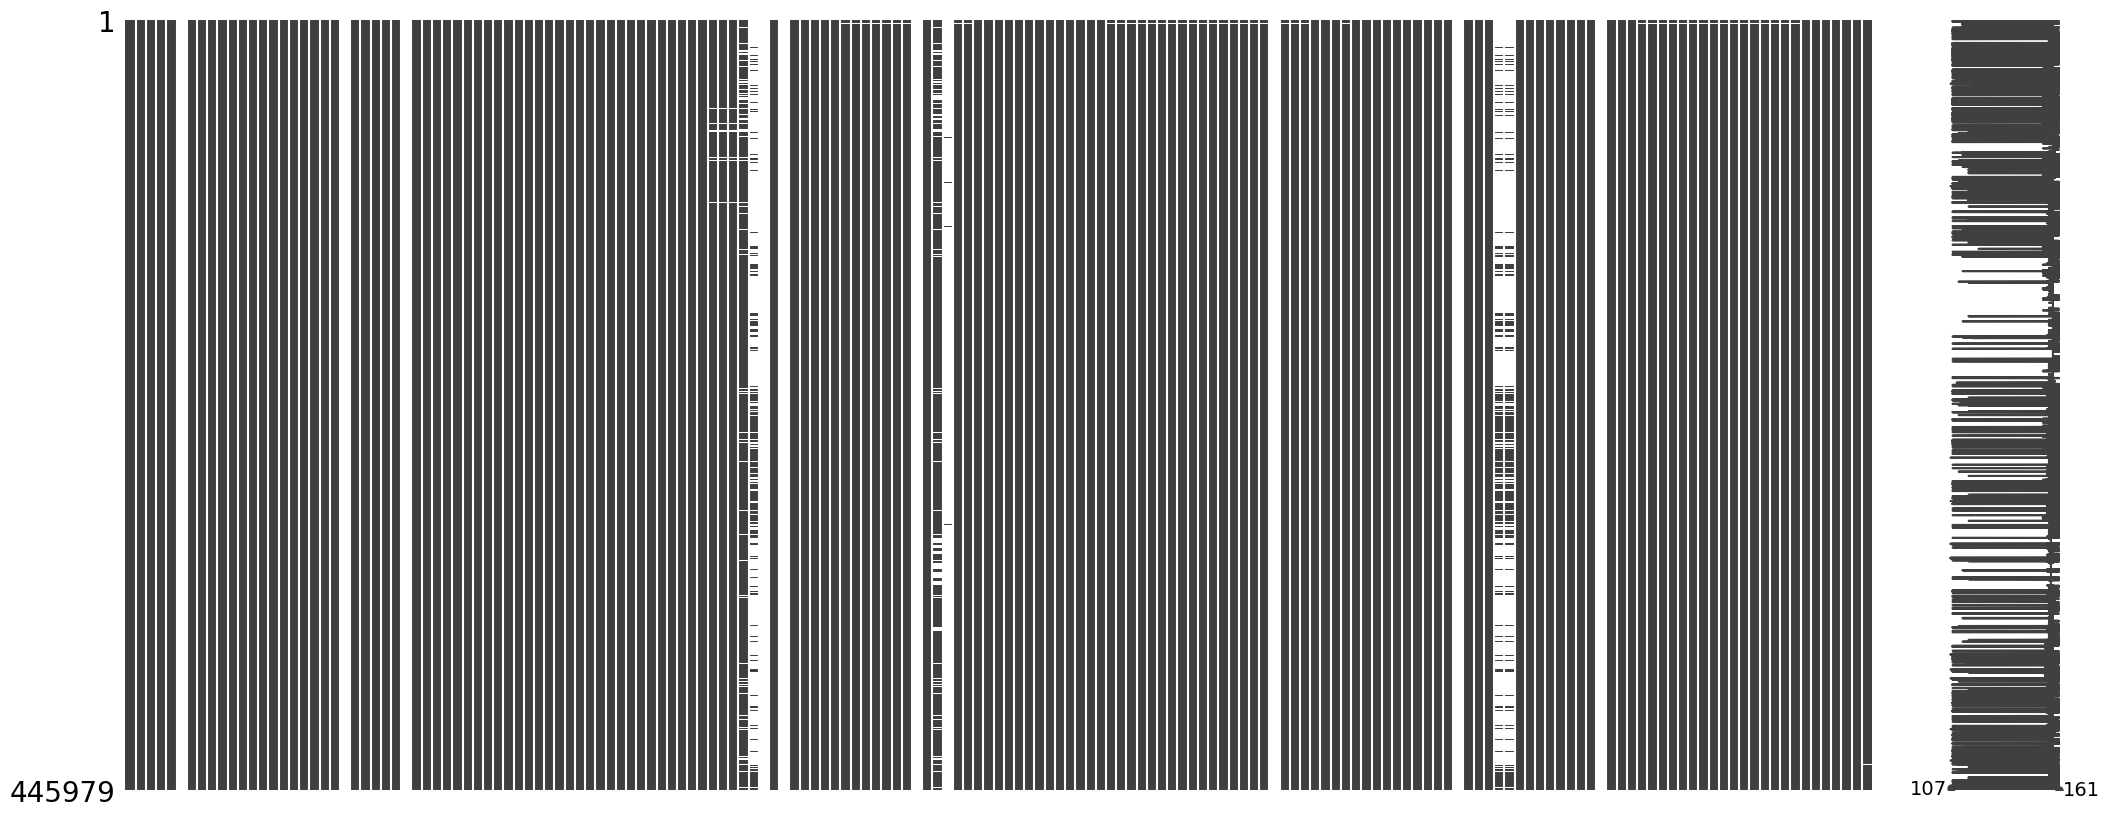

In [14]:
msno.matrix(data)

<AxesSubplot: >

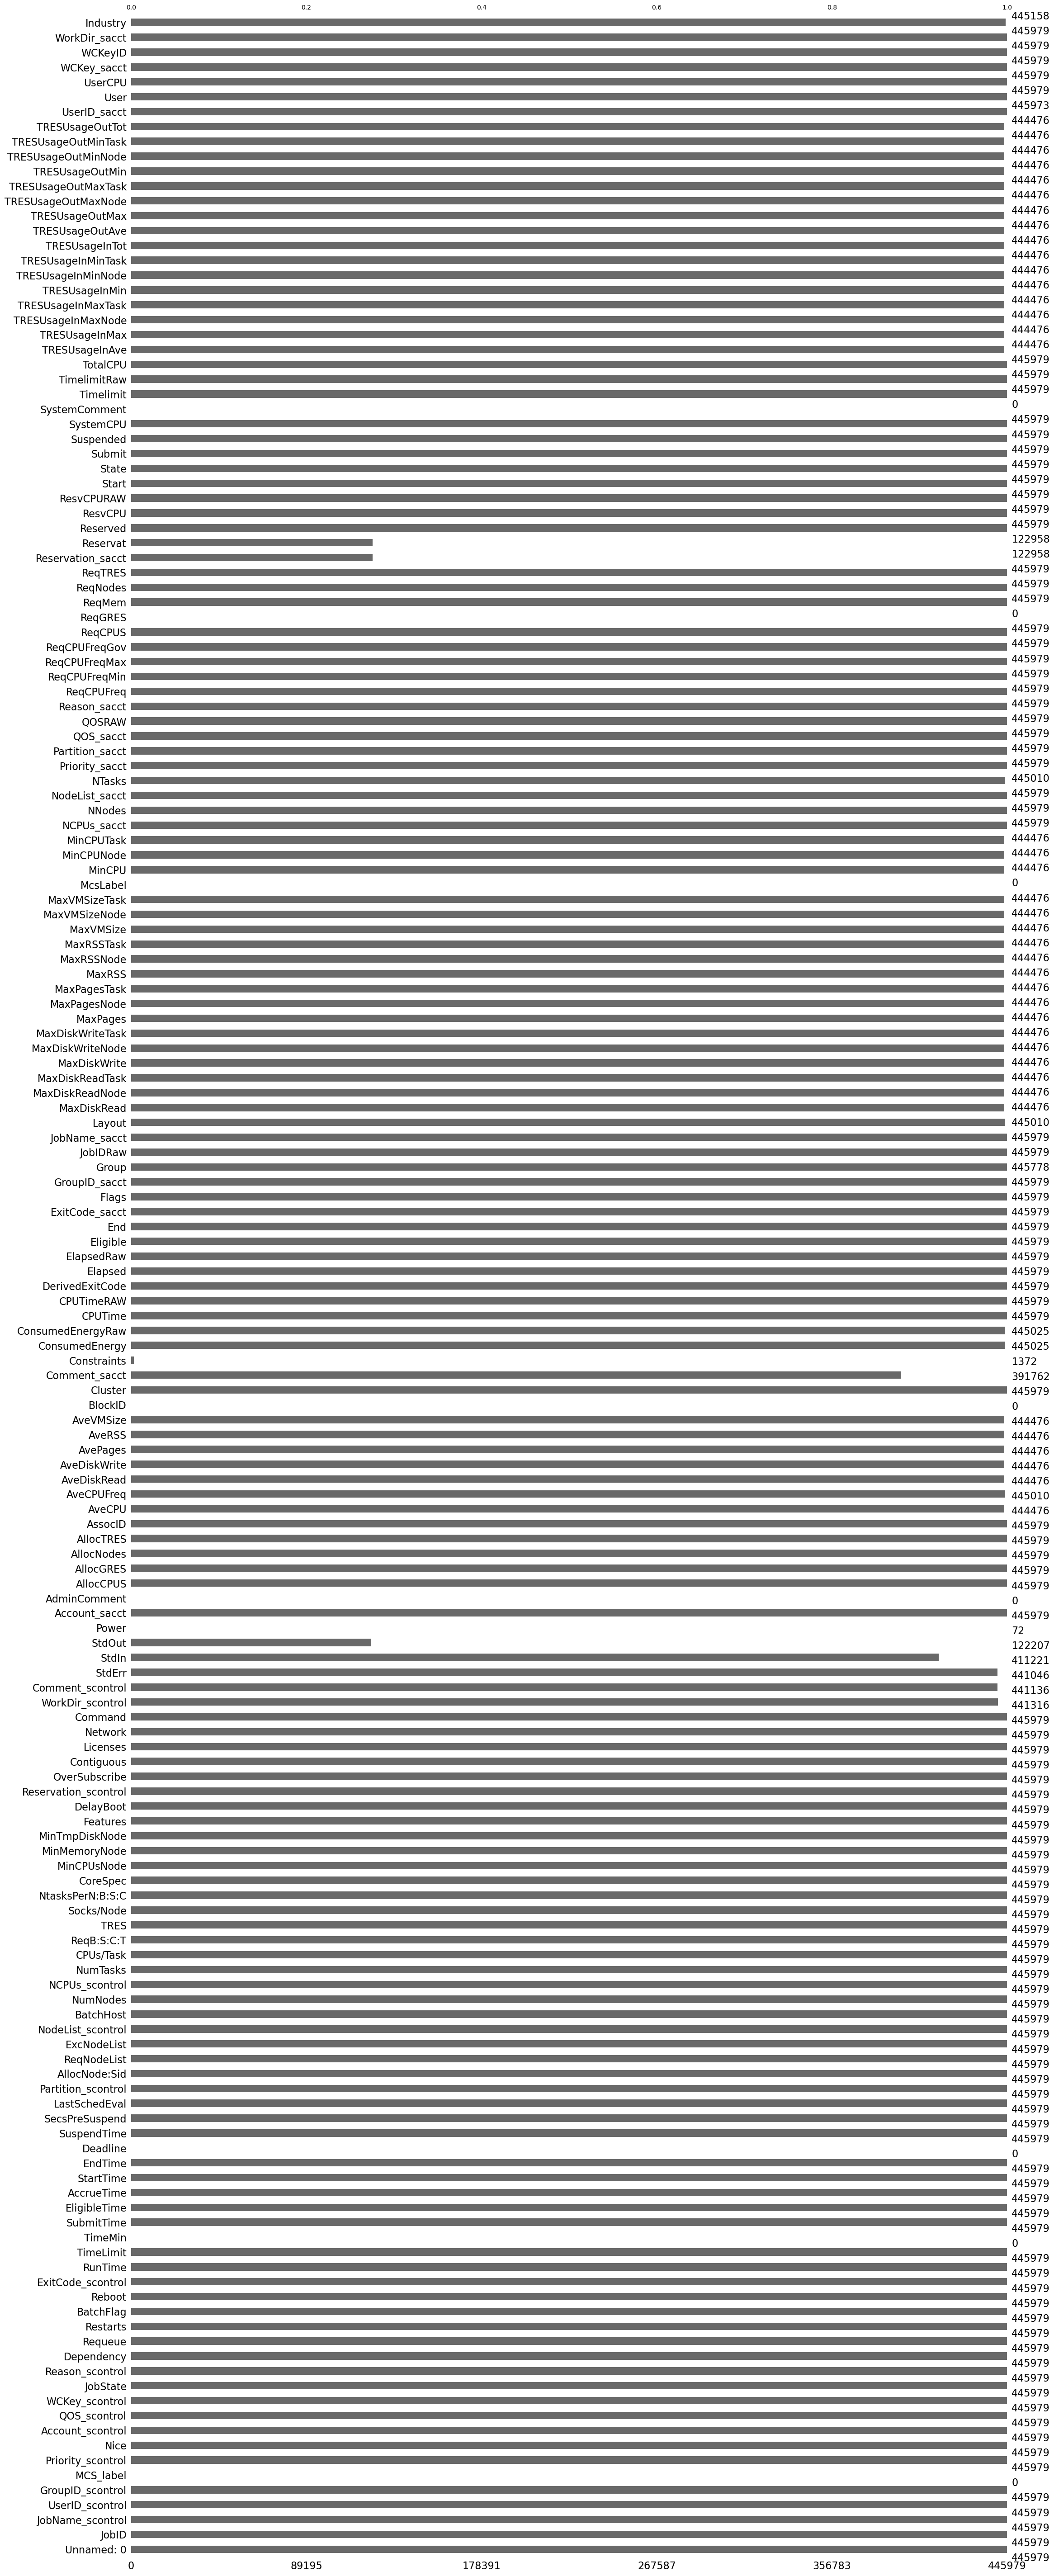

In [15]:
msno.bar(data)

Some parameters are not registered by systems or not filled by users.

In [4]:
# renaming columns
data = data.rename(columns={'Partition_scontrol': 'Partition', 'UserID_scontrol': 'UserID'})

# NaN Group is ikntvspi, NaN Industry is IT
data = data.fillna({'Group': 'ikntvspi', 'Industry': 'IT'})

## Jobs investigation

### Job states

In [16]:
# what types of states jobs have?

for i in data['State'].unique():
    print(i)

COMPLETED
CANCELLED
CANCELLED by 50456
FAILED
TIMEOUT
CANCELLED by 50619
NODE_FAIL
CANCELLED by 50608
CANCELLED by 50147
CANCELLED by 50665
CANCELLED by 50313
CANCELLED by 50190
CANCELLED by 50555
CANCELLED by 50119
CANCELLED by 50688
CANCELLED by 50671
CANCELLED by 0
CANCELLED by 50220
CANCELLED by 50693
CANCELLED by 50501
CANCELLED by 50701
CANCELLED by 50430
CANCELLED by 50700
CANCELLED by 50420
CANCELLED by 50706
CANCELLED by 50341
CANCELLED by 50549
CANCELLED by 50262
CANCELLED by 50674
CANCELLED by 50339
OUT_OF_MEMORY
CANCELLED by 50687
CANCELLED by 50442
CANCELLED by 50310
CANCELLED by 50222
CANCELLED by 50741
CANCELLED by 50302
CANCELLED by 50617
CANCELLED by 50303
RUNNING
CANCELLED by 50342
CANCELLED by 50189
CANCELLED by 50727
CANCELLED by 50390


In [5]:
# the column conteins extra symbols that should be cleaned

data['State'] = data['State'].map(lambda x: x[:9] if x.find(' ') != -1 else x)
data['State'].unique()

array(['COMPLETED', 'CANCELLED', 'FAILED', 'TIMEOUT', 'NODE_FAIL',
       'OUT_OF_MEMORY', 'RUNNING'], dtype=object)

In [8]:
# what fractions jobs have among the states?

def jobs_frac(state):
    return round(sum(data['State'] == state)/len(data['State']), 4)

jobs_fractions = {'COMPLETED': jobs_frac('COMPLETED'),\
                  'INCOMPLETED': round((sum(data.State != 'COMPLETED')/len(data.State)), 4),\
                  'CANCELLED': jobs_frac('CANCELLED'), 'TIMEOUT': jobs_frac('TIMEOUT'), 'FAILED': jobs_frac('FAILED'),\
                  'NODE_FAIL': round((sum(data.State == 'NODE_FAIL')/sum(data.State == 'FAILED')), 4),\
                  'OUT_OF_MEMORY': round((sum(data.State == 'OUT_OF_MEMORY')/sum(data.State == 'FAILED')), 4),\
                 'RUNNING': jobs_frac('RUNNING')}
jobs_fractions = pd.DataFrame(jobs_fractions, index=[0])
jobs_fractions

COMPLETED  INCOMPLETED  CANCELLED  TIMEOUT  FAILED  NODE_FAIL  \
0     0.9693       0.0307     0.0137   0.0004  0.0162     0.0017   

   OUT_OF_MEMORY  RUNNING  
0         0.0015   0.0003

96,93% of all placed jobs were completed.

### Monthly workload computation

The workload includes an execution time - ElapsedRaw in seconds, CPU time - CPUTimeRAW in seconds, nodes number - AllocNodes, CPUs number - AllocCPUS, jobs number - the length of the dataset and a jobs number in partitions.

End - is a time when a job was completed.

In [24]:
# verifying features types

data[['JobID', 'ElapsedRaw', 'CPUTimeRAW', 'AllocNodes', 'AllocCPUS', 'End']].dtypes

JobID          int64
ElapsedRaw     int64
CPUTimeRAW     int64
AllocNodes     int64
AllocCPUS      int64
End           object
dtype: object

In [26]:
data['End'].head(3)

0    2022-06-20T01:09:15
1    2022-06-20T11:45:37
2    2022-06-20T00:27:19
Name: End, dtype: object

In [28]:
data['End'].tail(3)

445976    Unknown
445977    Unknown
445978    Unknown
Name: End, dtype: object

In [6]:
# cleaning the End column
data['End'] = data['End'].map(lambda x: str(x).replace('T', ' '))

# filtering the last running jobs with unknown End-date|time
known_date = data[data.End != 'Unknown']

# transforming from object to datetime
known_date['End'] = pd.to_datetime(known_date['End'])

# separating the month
known_date['Month'] = known_date['End'].dt.month_name()

# monthly number of jobs
jobs = known_date.groupby('Month', as_index=False, sort=False).size()

# transforming seconds to hours
known_date['ElapsedRaw'] = known_date['ElapsedRaw'].map(lambda x: x / 3600)
known_date['CPUTimeRAW'] = known_date['CPUTimeRAW'].map(lambda x: x / 3600)

# monthly number of hours, nodes, CPUs
workload = known_date.groupby('Month', as_index=False, sort=False).aggregate({'ElapsedRaw': np.sum, 'CPUTimeRAW': np.sum,\
                                                                              'AllocNodes': np.sum, 'AllocCPUS': np.sum})
# combining with jobs number
workload = workload.merge(jobs)
workload

C:\Users\Kseniya\AppData\Local\Temp\ipykernel_12488\4188923199.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_date['End'] = pd.to_datetime(known_date['End'])
C:\Users\Kseniya\AppData\Local\Temp\ipykernel_12488\4188923199.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_date['Month'] = known_date['End'].dt.month_name()
C:\Users\Kseniya\AppData\Local\Temp\ipykernel_12488\4188923199.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Month     ElapsedRaw    CPUTimeRAW  AllocNodes  AllocCPUS    size
0       June   40605.282778  2.339017e+06       21960    1229648   21811
1       July  128456.230556  7.604933e+06       36629    2093300   36391
2     August  153701.353333  9.079973e+06      154583    8783688  154356
3  September  181512.102500  1.091043e+07      100559    5876984  100393
4    October  168372.249444  1.026734e+07       91229    5327944   90765
5   November   92371.244167  5.763469e+06       42307    2757272   42113

In [106]:
# reducing the scale of values

workload = workload.rename(columns={'ElapsedRaw': 'ExecutionTime x 10^2, hours', 'CPUTimeRAW': 'CPUTime x 10^5, hours', \
                                    'AllocNodes': 'Nodes x 10^3', 'AllocCPUS': 'CPUs x 10^4', 'size': 'Jobs x 10^3'})

workload['ExecutionTime x 10^2, hours'] = workload['ExecutionTime x 10^2, hours'] / 100
workload['CPUTime x 10^5, hours'] = workload['CPUTime x 10^5, hours'] / 100000
workload['Nodes x 10^3'] = workload['Nodes x 10^3'] / 1000
workload['CPUs x 10^4'] = workload['CPUs x 10^4'] / 10000
workload['Jobs x 10^3'] = workload['Jobs x 10^3'] / 1000

workload

Month  ExecutionTime x 10^2, hours  CPUTime x 10^5, hours  \
0       June                   406.052828              23.390165   
1       July                  1284.562306              76.049329   
2     August                  1537.013533              90.799728   
3  September                  1815.121025             109.104276   
4    October                  1683.722494             102.673429   
5   November                   923.712442              57.634692   

   Nodes x 10^3  CPUs x 10^4  Jobs x 10^3  
0        21.960     122.9648       21.811  
1        36.629     209.3300       36.391  
2       154.583     878.3688      154.356  
3       100.559     587.6984      100.393  
4        91.229     532.7944       90.765  
5        42.307     275.7272       42.113

In [109]:
# visualizing

def workload_histograms(df):
    
    fig, ax = plt.subplots(3, 2, figsize=(15,15))
    fig.suptitle('Supercomputer workload', fontsize=16)
    plt.rcParams['font.size'] = '12'
    
    def plot_settings(df, x, y, i, j):
        sns.barplot(data=df, x=x, y=y, ax=ax[i,j])    
        
    plot_settings(df, 'Month', 'Jobs x 10^3', 0, 0) 
    plot_settings(df, 'Month', 'ExecutionTime x 10^2, hours', 1, 0)
    plot_settings(df, 'Month', 'CPUTime x 10^5, hours', 1, 1)
    plot_settings(df, 'Month', 'Nodes x 10^3', 2, 0)
    plot_settings(df, 'Month', 'CPUs x 10^4', 2, 1)
    
    ax[0, 1].remove()
    
    plt.savefig('save_plot.png', facecolor='w', edgecolor='w')

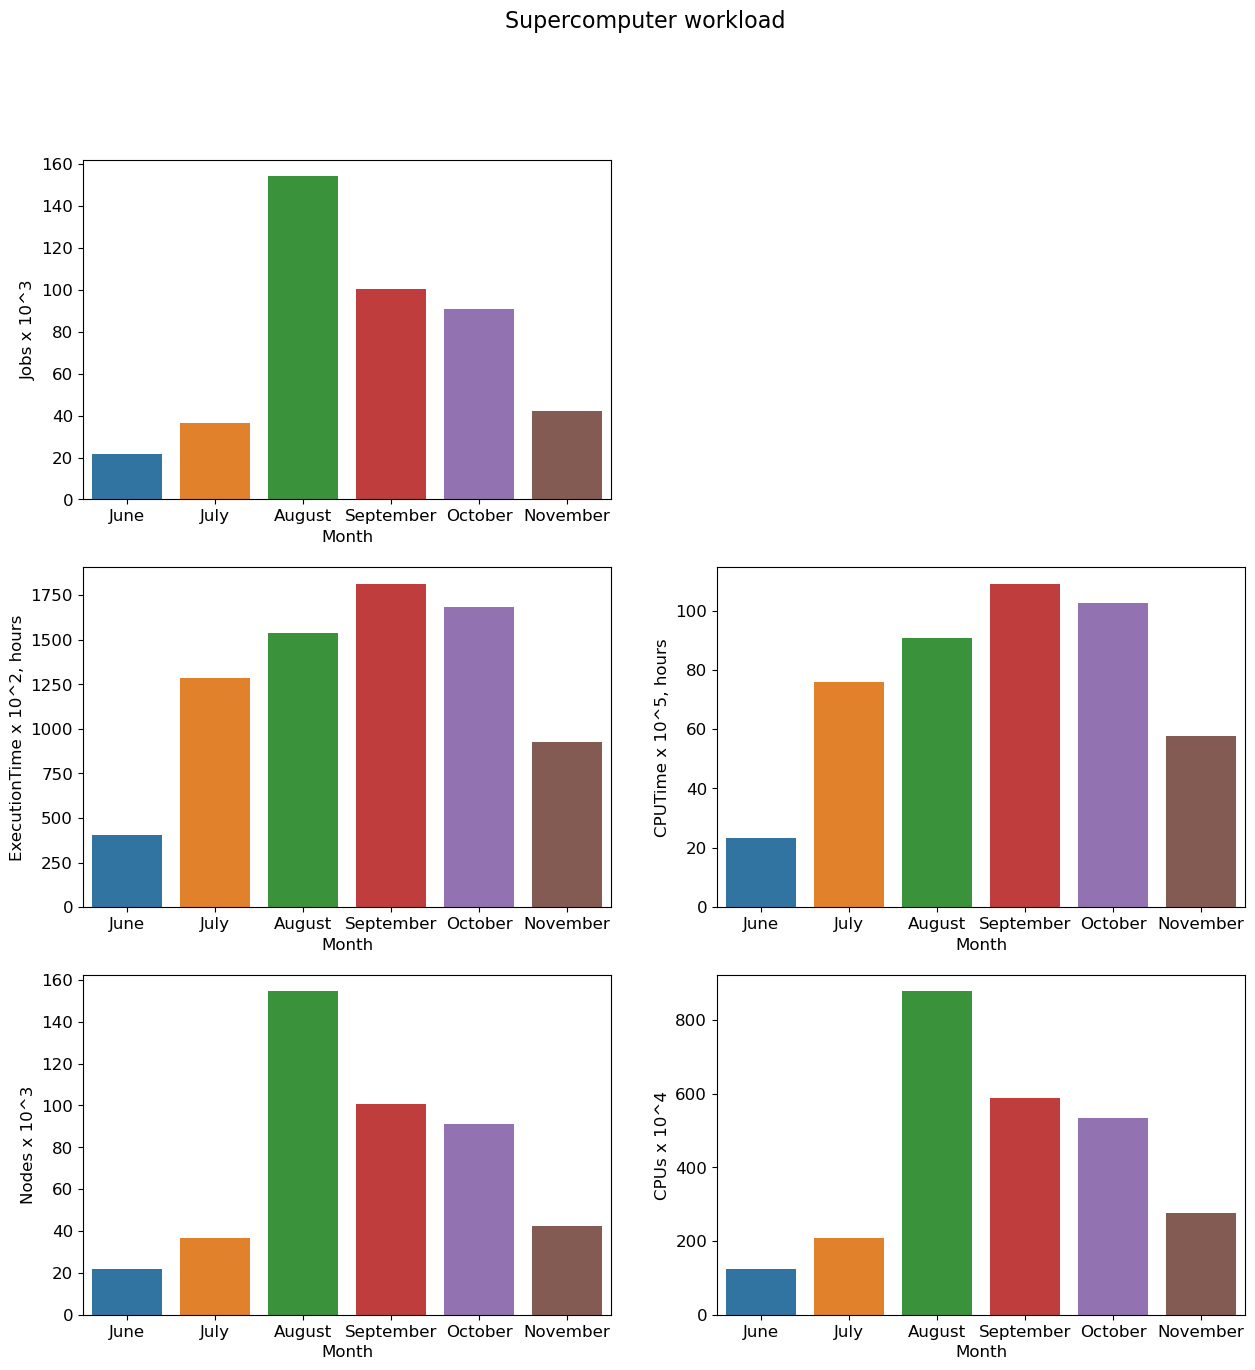

In [110]:
workload_histograms(workload)

It should be pointed out that the data have recordings starting from the middle of June and ending to the middle of November. Therefore, June and November show a half of monthly workload only.

Presumably, a workload could have seasonal trends. In summer months users place less jobs than in others because of summer vacations. The workload increases in autumn months.

Graphs show the following:
- June and July had much fewer jobs than other months. The biggest number of jobs was placed in August as well as the biggest number of allocated nodes and CPUs.
- Nevertheless, in the terms of allocated time and CPU time the most loaded month was September.
- November seems to be closer to September and October.

In [112]:
# jobs number in partitions

partition = data.groupby('Partition', as_index=False).size()
partition

Partition    size
0      cascade   25535
1           g2   22050
2      tornado  391616
3  tornado-k40    6778

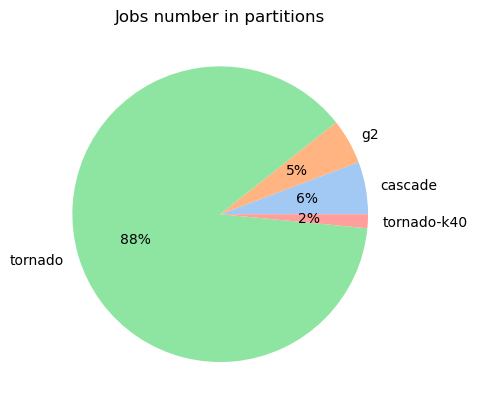

In [121]:
# visualizing

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[ 0:6 ]

#plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = '10'

#create pie chart
plt.pie(partition['size'], labels = partition['Partition'], colors = colors, autopct='%.0f%%') 
plt.title(label='Jobs number in partitions')
plt.savefig('partition_pie.png', facecolor='w', edgecolor='w')

Partitions mean different physical clusters having different hardware architectures. Tornado was loaded the most.

### Resources investigation

The general resources allocated by scheduler are ElapsedRaw, AllocNodes, AllocCPUS.

The general resources requested by user are TimelimitRaw, ReqNodes, ReqCPUS.

A user creates a request for resources allocation and fills necessary filds. The general parameters are the estimated time of job execution and the number of nodes. These parameters are used by the scheduler for the allocating of supercomputer resources.

ElapsedRaw is recorded in seconds while TimelimitRaw is recorded in minutes.

In [94]:
# transforming ElapsedRaw from seconds to minutes

data['ElapsedRaw'] = data['ElapsedRaw'].map(lambda x: x / 60)

In [8]:
# How do users fill the fields or choose the options?

# jobs fraction with undefined estimated time (user did not fill the field or choose the option)
undefined_estimated_time_frac = sum(data.TimelimitRaw == 0)/len(data)
print(f'jobs fraction with undefined estimated time = {undefined_estimated_time_frac}')

# jobs fraction with undefined nodes (user did not fill the field or choose the option)
undefined_nodes_frac = sum(data.ReqNodes == 0)/len(data)
print(f'jobs fraction with undefined nodes = {undefined_nodes_frac}') 

jobs fraction with undefined estimated time = 0.0
jobs fraction with undefined nodes = 0.0


Users have to define the estimated time and number of nodes.

In [ ]:
# How do users estimate the time?

In [12]:
# users time esimation

# underestimated jobs
def under_time(data):
    return data[data.TimelimitRaw < (data.ElapsedRaw - data.ElapsedRaw*0.1)]

# overestimated jobs
def over_time(data):
    return data[data.TimelimitRaw > (data.ElapsedRaw + data.ElapsedRaw*0.1)]

# 10% error estimated jobs
def time_error_10(data):
    return data[((data.ElapsedRaw - data.ElapsedRaw*0.1) < data.TimelimitRaw) & \
                        ((data.ElapsedRaw + data.ElapsedRaw*0.1) > data.TimelimitRaw)]

In [95]:
# the fraction of underestimated jobs (user requested less time than were allocated)
under_time_frac = len(under_time(data))/len(data)
print(f'the fraction of underestimated jobs = {under_time_frac}')

# the fraction of overestimated jobs (user requested more time than were allocated)
over_time_frac = len(over_time(data))/len(data)
print(f'the fraction of overestimated jobs = {over_time_frac}')

# the fraction of jobs estimated with 10% time error
time_error_10_frac = len(time_error_5(data))/len(data) 
print(f'the fraction of jobs estimated with 10% time error = {time_error_10_frac}')

the fraction of underestimated jobs = 0.0
the fraction of overestimated jobs = 1.0
the fraction of jobs estimated with 10% time error = 0.0


All jobs were overestimated.

In [96]:
# How do users estimate the nodes?

# the fraction of jobs having requested nodes = allocated nodes
equal_CPUS_frac = sum(data.ReqCPUS == data.AllocCPUS)/len(data)
print(f'the fraction of jobs which requested nodes = allocated nodes = {equal_CPUS_frac}')

# the fraction of jobs having requested nodes < allocated nodes
under_CPUS_frac = sum(data.ReqCPUS < data.AllocCPUS)/len(data)
print(f'the fraction of jobs which requested nodes < allocated nodes = {under_CPUS_frac}')

# the fraction of jobs having requested nodes > allocated nodes
over_CPUS_frac = sum(data.ReqCPUS > data.AllocCPUS)/len(data)
print(f'the fraction of jobs which requested nodes > allocated nodes = {over_CPUS_frac}')

the fraction of jobs which requested nodes = allocated nodes = 0.9884187372051151
the fraction of jobs which requested nodes < allocated nodes = 0.01158126279488496
the fraction of jobs which requested nodes > allocated nodes = 0.0


The scheduler allocates the requested number of nodes and does not adapt this option according to a job size.

In [97]:
# How many jobs have default settings 2 days and 1 node?

# the fraction of jobs having default settings 2 days and 1 node
default = data[(data.TimelimitRaw == 2880) & (data.ReqNodes == 1)]
default_frac = len(default)/len(data)
print(f'the fraction of jobs having default settings 2 days and 1 node = {default_frac}')

# underestimated fraction among them
under_time_default_frac = len(under_time(default))/len(default)
print(f'underestimated fraction among them = {under_time_default_frac}')

# overestimated fraction among them
over_time_default_frac = len(over_time(default))/len(default)
print(f'overestimated fraction among them = {over_time_default_frac}')

the fraction of jobs having default settings 2 days and 1 node = 0.8691350938048652
underestimated fraction among them = 0.0
overestimated fraction among them = 1.0


Users placed 86,9% jobs with the default settings 2 days and 1 node while all of them were overestimated.

### Users behavior investigation

In [135]:
# the function of statistics computation

def statistics(data, union_attribute):
    union = data.groupby(union_attribute, as_index=False).size()
    union = union.rename(columns={'size': 'Jobs'})
    
    # total resources
    union_sum_resources = data.groupby(union_attribute, as_index=False).aggregate({'ElapsedRaw': np.sum, \
                                                                            'AllocNodes': np.sum,'AllocCPUS': np.sum})\
    .rename(columns={'ElapsedRaw':'ElapsedRaw_sum', 'AllocNodes': 'AllocNodes_sum', 'AllocCPUS': 'AllocCPUS_sum'})
    
    # merging with jobs number
    union_sum_resources = union_sum_resources.merge(union)

    # computing percentiles 
    def percentile(n):
        def percentile_(x):
            return np.percentile(x, n)
        percentile_.__name__ = 'percentile_%s' % n
        return percentile_

    union_raw = data.groupby(union_attribute, as_index=False)
    
    # time statistics: average, standard deviation, median, quantiles, min, max, variance
    union_stat_time = union_raw['ElapsedRaw']
    union_stat_time = union_stat_time.agg([np.mean, np.std, np.median, percentile(25), percentile(75), np.min, np.max,\
                                             np.var]).reset_index()
    union_stat_time = union_stat_time.rename(columns={'mean': 'ExecTime_mean', 'std': 'ExecTime_std', \
                                                      'median': 'ExecTime_med', 'percentile_25': 'ExecTime_perc25', \
                                                      'percentile_75': 'ExecTime_perc75', 'amin': 'ExecTime_min', \
                                                      'amax': 'ExecTime_max', 'var': 'ExecTime_var'})
    
    # nodes statistics: average, standard deviation
    union_stat_nodes = union_raw['AllocNodes']
    union_stat_nodes = union_stat_nodes.agg([np.mean, np.std]).reset_index()
    union_stat_nodes = union_stat_nodes.rename(columns={'mean': 'Nodes_mean', 'std': 'Nodes_std'})

    # CPUs statistics: average, standard deviation
    union_stat_cpus = union_raw['AllocCPUS']
    union_stat_cpus = union_stat_cpus.agg([np.mean, np.std]).reset_index()
    union_stat_cpus = union_stat_cpus.rename(columns={'mean': 'CPUs_mean', 'std': 'CPUs_std'})
    
    # merging frames
    union_stat = union_sum_resources
    union_stat = union_stat.merge(union_stat_time, how = 'left', on = union_attribute)
    union_stat = union_stat.merge(union_stat_nodes, how = 'left', on = union_attribute)
    union_stat = union_stat.merge(union_stat_cpus, how = 'left', on = union_attribute)
    
    # the fraction of underestimated jobs
    union_time_estimation = under_time(data).groupby(union_attribute, as_index=False).size()
    union_time_estimation = union_time_estimation.rename(columns={'size': 'UnderTime'})
    union_time_estimation = union.merge(union_time_estimation, how = 'left', on = union_attribute).fillna({'UnderTime': 0})\
    .astype({'UnderTime': 'int64'})
    union_time_estimation['UnderTimeFrac'] = union_time_estimation['UnderTime'] / union_time_estimation['Jobs']

    # the fraction of overestimated jobs 
    union_time_estimation_over = over_time(data).groupby(union_attribute, as_index=False).size()
    union_time_estimation_over = union_time_estimation_over.rename(columns={'size': 'OverTime'})
    union_time_estimation = union_time_estimation.merge(union_time_estimation_over, how = 'left', on = union_attribute)\
    .fillna({'OverTime': 0}).astype({'OverTime': 'int64'})
    union_time_estimation['OverTimeFrac'] = union_time_estimation['OverTime'] / union_time_estimation['Jobs']

    # the fraction of jobs estimated with 10% time error
    union_time_estimation_error_10 = time_error_10(data).groupby(union_attribute, as_index=False).size()
    union_time_estimation_error_10 = union_time_estimation_error_10.rename(columns={'size': '10%error'})
    union_time_estimation = union_time_estimation.merge(union_time_estimation_error_10, how = 'left', on = union_attribute)\
    .fillna({'10%error': 0}).astype({'10%error': 'int64'})
    union_time_estimation['10%errorFrac'] = union_time_estimation['10%error'] / union_time_estimation['Jobs']
    
    # merging frames
    union_stat = union_stat.merge(union_time_estimation, how = 'left', on = union_attribute)
    union_stat = union_stat.drop(columns={'Jobs_y'})
    union_stat = union_stat.rename(columns={'Jobs_x': 'Jobs'})
    
    # the fraction of jobs having default settings 2 days and 1 node
    default = data[(data.TimelimitRaw == 2880) & (data.ReqNodes == 1)]
    union_default = default.groupby(union_attribute, as_index=False).size()
    union_default = union_default.rename(columns={'size': 'DefaultJobs'})
    union_default = union.merge(union_default, how = 'left', on = union_attribute).fillna({'DefaultJobs': 0})\
    .astype({'DefaultJobs': 'int64'})
    union_default['DefaultFrac'] = union_default['DefaultJobs'] / union_default['Jobs'] 
    
    # underestimated fraction among them
    union_under_default = under_time(default).groupby(union_attribute, as_index=False).size()
    union_under_default = union_under_default.rename(columns={'size': 'UnderJobs'})
    union_default = union_default.merge(union_under_default, how = 'left', on = union_attribute).fillna({'UnderJobs': 0})\
    .astype({'UnderJobs': 'int64'})
    union_default['UnderFrac'] = union_default['UnderJobs'] / union_default['DefaultJobs'] 
    union_default = union_default.fillna({'UnderFrac': 0})

    # overestimated fraction among them
    union_over_default = over_time(default).groupby(union_attribute, as_index=False).size()
    union_over_default = union_over_default.rename(columns={'size': 'OverJobs'})
    union_default = union_default.merge(union_over_default, how = 'left', on = union_attribute).fillna({'OverJobs': 0})\
    .astype({'OverJobs': 'int64'})
    union_default['OverFrac'] = union_default['OverJobs'] / union_default['DefaultJobs'] 
    union_default = union_default.fillna({'OverFrac': 0})
    
    # merging frames
    union_stat = union_stat.merge(union_default, how = 'left', on = union_attribute)
    union_stat = union_stat.drop(columns={'Jobs_y'})
    union_stat = union_stat.rename(columns={'Jobs_x': 'Jobs'})
    
    return union_stat

In [156]:
# plotting functions

# plotting distribution and statistics
def attribute_distribution_stats(df, attribute, xlabel, title):
    plt.figure(figsize=(10,5))
    plt.rcParams['font.size'] = '12'
    sns.histplot(df[attribute])
    plt.axvline(df[attribute].median(), color='r', linestyle='dashed', linewidth=1, label='median')
    plt.axvline(df[attribute].mean(), color='purple', linestyle='dashed', linewidth=1, label='average')
    plt.axvline(df[attribute].quantile(0.25), color='r', linestyle='dotted', linewidth=1, \
                label='25% и 75% quantiles')
    plt.axvline(df[attribute].quantile(0.75), color='r', linestyle='dotted', linewidth=1)
    plt.legend()
    plt.xlabel(xlabel=xlabel)
    plt.ylabel(ylabel='Frequency')
    plt.title(label=title)
    plt.savefig('save_plot.png', facecolor='w', edgecolor='w')

# plotting distribution
def attribute_distribution(df, attribute, xlabel, xlim, title):
    plt.figure(figsize=(10,5))
    plt.rcParams['font.size'] = '12'
    sns.histplot(df[attribute])
    plt.xlabel(xlabel=xlabel)
    plt.ylabel(ylabel='Frequency')
    plt.xlim(0, xlim)
    plt.title(label=title)
    plt.savefig('save_plot.png', facecolor='w', edgecolor='w')

# plotting distribution, 3 plots
def attribute_distribution_3plots(df, title, ylim, attribute_1, xlabel_1, attribute_2, xlabel_2, \
                                attribute_3, xlabel_3):
    fig, ax = plt.subplots(3, 1, figsize=(10,13))
    fig.suptitle(title, fontsize=12)
    plt.rcParams['font.size'] = '12'
    
    def plot_settings(attribute, i, ylim, xlabel):
        sns.histplot(df[attribute], ax=ax[i])
        ax[i].axvline(df[attribute].median(), color='r', linestyle='dashed', linewidth=1, label='median')
        ax[i].axvline(df[attribute].mean(), color='purple', linestyle='dashed', linewidth=1, label='average')
        ax[i].axvline(df[attribute].quantile(0.25), color='r', linestyle='dotted', linewidth=1, \
                        label='25% и 75% quantiles')
        ax[i].axvline(df[attribute].quantile(0.75), color='r', linestyle='dotted', linewidth=1)
        ax[i].legend()
        if ylim != None:
            ax[i].set_ylim([0, ylim])
        ax[i].set_xlabel(xlabel=xlabel)
        ax[i].set_ylabel(ylabel='Frequency')
    
    plot_settings(attribute_1, 0, ylim, xlabel_1) 
    plot_settings(attribute_2, 1, ylim, xlabel_2)
    plot_settings(attribute_3, 2, ylim, xlabel_3)
    
    plt.savefig('save_plot.png', facecolor='w', edgecolor='w')    
    
# plotting distribution, 4 plots 
def attribute_distribution_4plots(df, title, ylim, attribute_1, xlabel_1, attribute_2, xlabel_2, \
                                attribute_3, xlabel_3, attribute_4, xlabel_4):
    fig, ax = plt.subplots(2, 2, figsize=(15,10))
    fig.suptitle(title, fontsize=12)
    plt.rcParams['font.size'] = '12'
    
    def plot_settings(attribute, i, j, ylim, xlabel):
        sns.histplot(df[attribute], ax=ax[i,j])
        ax[i,j].axvline(df[attribute].median(), color='r', linestyle='dashed', linewidth=1, label='median')
        ax[i,j].axvline(df[attribute].mean(), color='purple', linestyle='dashed', linewidth=1, label='average')
        ax[i,j].axvline(df[attribute].quantile(0.25), color='r', linestyle='dotted', linewidth=1, \
                        label='25% и 75% quantiles')
        ax[i,j].axvline(df[attribute].quantile(0.75), color='r', linestyle='dotted', linewidth=1)
        ax[i,j].legend()
        ax[i,j].set_ylim([0, ylim])
        ax[i,j].set_xlabel(xlabel=xlabel)
        ax[i,j].set_ylabel(ylabel='Frequency')
    
    plot_settings(attribute_1, 0, 0, ylim, xlabel_1) 
    plot_settings(attribute_2, 0, 1, ylim, xlabel_2)
    plot_settings(attribute_3, 1, 0, ylim, xlabel_3)
    plot_settings(attribute_4, 1, 1, ylim, xlabel_4)
    
    plt.savefig('save_plot.png', facecolor='w', edgecolor='w')
    
# plotting distribution, 6 plots     
def attribute_distribution_6plots(df, title, ylim, attribute_1, xlabel_1, attribute_2, xlabel_2, \
                                attribute_3, xlabel_3, attribute_4, xlabel_4, attribute_5, xlabel_5,\
                                 attribute_6, xlabel_6):
    fig, ax = plt.subplots(3, 2, figsize=(15,15))
    fig.suptitle(title, fontsize=16)
    plt.rcParams['font.size'] = '14'
    
    def plot_settings(attribute, i, j, ylim, xlabel):
        sns.histplot(df[attribute], ax=ax[i,j])
        ax[i,j].axvline(df[attribute].median(), color='r', linestyle='dashed', linewidth=1, label='median')
        ax[i,j].axvline(df[attribute].mean(), color='purple', linestyle='dashed', linewidth=1, label='average')
        ax[i,j].axvline(df[attribute].quantile(0.25), color='r', linestyle='dotted', linewidth=1, \
                        label='25% и 75% quantiles')
        ax[i,j].axvline(df[attribute].quantile(0.75), color='r', linestyle='dotted', linewidth=1)
        ax[i,j].legend()
        ax[i,j].set_ylim([0, ylim])
        ax[i,j].set_xlabel(xlabel=xlabel)
        ax[i,j].set_ylabel(ylabel='Frequency')
    
    plot_settings(attribute_1, 0, 0, ylim, xlabel_1) 
    plot_settings(attribute_2, 0, 1, ylim, xlabel_2)
    plot_settings(attribute_3, 1, 0, ylim, xlabel_3)
    plot_settings(attribute_4, 1, 1, ylim, xlabel_4)
    plot_settings(attribute_5, 2, 0, ylim, xlabel_5)
    plot_settings(attribute_6, 2, 1, ylim, xlabel_6)
    
    plt.savefig('save_plot.png', facecolor='w', edgecolor='w')

# plotting geovation group distribution 
def geovation_distributions(df, title, attribute_1, xlabel_1, attribute_2, xlabel_2, \
                                attribute_3, xlabel_3):
    fig, ax = plt.subplots(2, 2, figsize=(15,10))
    fig.suptitle(title, fontsize=16)
    plt.rcParams['font.size'] = '11'
    
    def plot_settings(i, j, attribute, bins, xlim, ylim, xlabel):
        ax[i,j].hist(df[attribute], bins=bins)
        if xlim != None:
            ax[i,j].set_xlim([0, xlim])
        ax[i,j].set_ylim([0, ylim])
        ax[i,j].set_xlabel(xlabel=xlabel)
        ax[i,j].set_ylabel(ylabel='Frequency')
    
    plot_settings(0, 0, attribute_1, 100, None, 400000, xlabel_1) #9000
    plot_settings(1, 0, attribute_2, 10, 1.6, 400000, xlabel_2)
    plot_settings(1, 1, attribute_3, 10, 100, 400000, xlabel_3)
    ax[0,1].remove()
    
    plt.savefig('save_plot.png', facecolor='w', edgecolor='w')

#### Users groups investigation

In [136]:
# statistics computation

groups_stat = statistics(data, 'Group')
groups_stat

Group  ElapsedRaw_sum  AllocNodes_sum  AllocCPUS_sum  Jobs  \
0     agri      304.916389              31           1736    31   
1   alexxy      808.625556              38           2128    38   
2    aogoi        1.571667               3            168     3   
3   cadfem      220.628056              30           1680    30   
4     cnti     6274.992778             841          47296   839   
..     ...             ...             ...            ...   ...   
58  scantr        3.324444               3            168     3   
59   tesis      100.447222              74           4144    74   
60  user12       15.581667             145           8240   143   
61  user50     1661.652222             302          19752   183   
62   vtune     1861.068889             292          16352   292   

    ExecTime_mean  ExecTime_std  ExecTime_med  ExecTime_perc25  \
0        9.836013     12.870799      0.972222         0.011528   
1       21.279620     40.380540      1.679722         0.010486   
2        0.523889      0.461106      0.546389         0.299167   
3        7.354269     13.168512      0.349167         0.019861   
4        7.479133     15.621811      1.402222         0.030278   
..            ...           ...           ...              ...   
58       1.108148      0.332664      1.033889         0.926389   
59       1.357395      3.775609      0.051667         0.033681   
60       0.108963      0.723518      0.023889         0.007917   
61       9.080067     31.003814      0.116389         0.007917   
62       6.373524      8.430579      3.123194         0.271111   

    ExecTime_perc75  ...  OverTime  OverTimeFrac  10%error  10%errorFrac  \
0         23.753889  ...        31           1.0         0           0.0   
1         26.317569  ...        38           1.0         0           0.0   
2          0.759861  ...         3           1.0         0           0.0   
3          7.241458  ...        30           1.0         0           0.0   
4          4.911111  ...       839           1.0         0           0.0   
..              ...  ...       ...           ...       ...           ...   
58         1.252778  ...         3           1.0         0           0.0   
59         0.462361  ...        74           1.0         0           0.0   
60         0.081250  ...       143           1.0         0           0.0   
61         0.959444  ...       183           1.0         0           0.0   
62         9.335278  ...       292           1.0         0           0.0   

    DefaultJobs  DefaultFrac  UnderJobs  UnderFrac  OverJobs  OverFrac  
0             0     0.000000          0        0.0         0       0.0  
1             0     0.000000          0        0.0         0       0.0  
2             0     0.000000          0        0.0         0       0.0  
3            19     0.633333          0        0.0        19       1.0  
4             0     0.000000          0        0.0         0       0.0  
..          ...          ...        ...        ...       ...       ...  
58            0     0.000000          0        0.0         0       0.0  
59            0     0.000000          0        0.0         0       0.0  
60            0     0.000000          0        0.0         0       0.0  
61            0     0.000000          0        0.0         0       0.0  
62           42     0.143836          0        0.0        42       1.0  

[63 rows x 29 columns]

In [24]:
for i in groups_stat.columns:
    print(i)

Group
ElapsedRaw_sum
AllocNodes_sum
AllocCPUS_sum
Jobs
ExecTime_mean
ExecTime_std
ExecTime_med
ExecTime_perc25
ExecTime_perc75
ExecTime_min
ExecTime_max
ExecTime_var
Nodes_mean
Nodes_std
CPUs_mean
CPUs_std
UnderTime
UnderTimeFrac
OverTime
OverTimeFrac
10%error
10%errorFrac
DefaultJobs
DefaultFrac
UnderJobs
UnderFrac
OverJobs
OverFrac


Geovation group has software that allows to place jobs automatically.

In [137]:
geovation_jobs_frac = sum(data.Group == 'geovation')/len(data)
print(f'the jobs fraction of geovation group = {geovation_jobs_frac}')

the jobs fraction of geovation group = 0.8796804333836347


This group takes 87,97% jobs. Therefore, it would be reasonable to investigate this group separately.  

In [138]:
# separating the geovation group

groups_stat_nongeo = groups_stat[groups_stat.Group != 'geovation']

In [ ]:
# visualizing the groups statistics excepting geovation

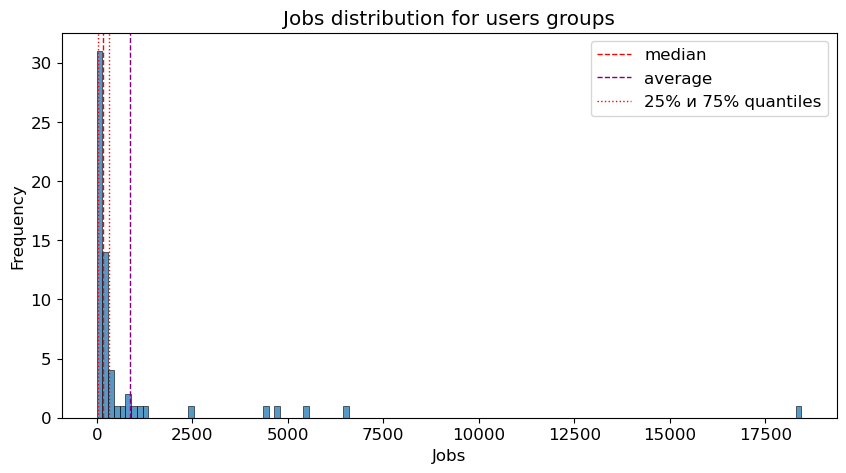

In [158]:
attribute_distribution_stats(groups_stat_nongeo, 'Jobs', 'Jobs', 'Jobs distribution for users groups')

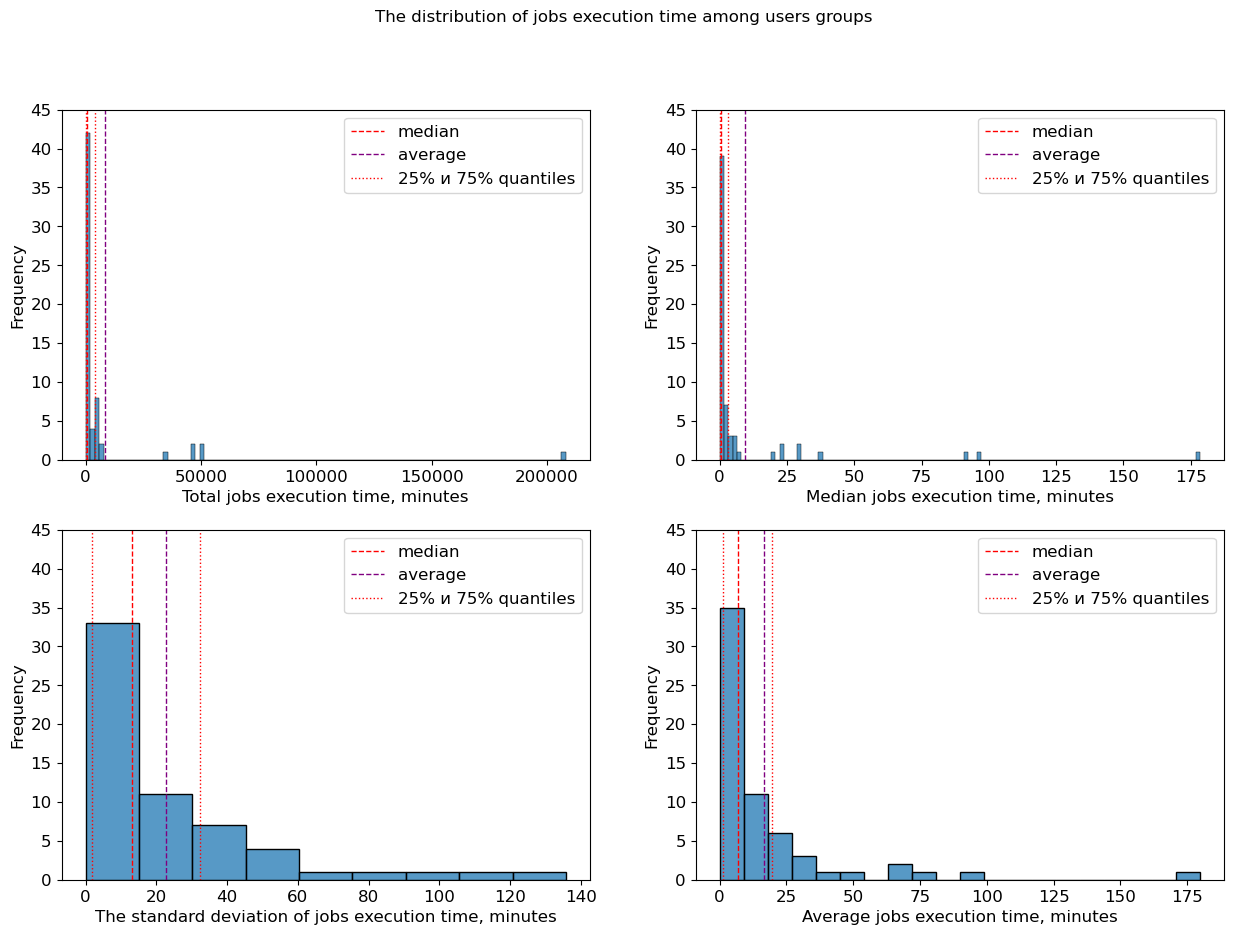

In [102]:
attribute_distribution_4plots(groups_stat_nongeo, 'The distribution of jobs execution time among users groups', 45, \
                             'ElapsedRaw_sum', 'Total jobs execution time, minutes', \
                            'ExecTime_med', 'Median jobs execution time, minutes', \
                            'ExecTime_std', 'The standard deviation of jobs execution time, minutes', \
                       'ExecTime_mean', 'Average jobs execution time, minutes')

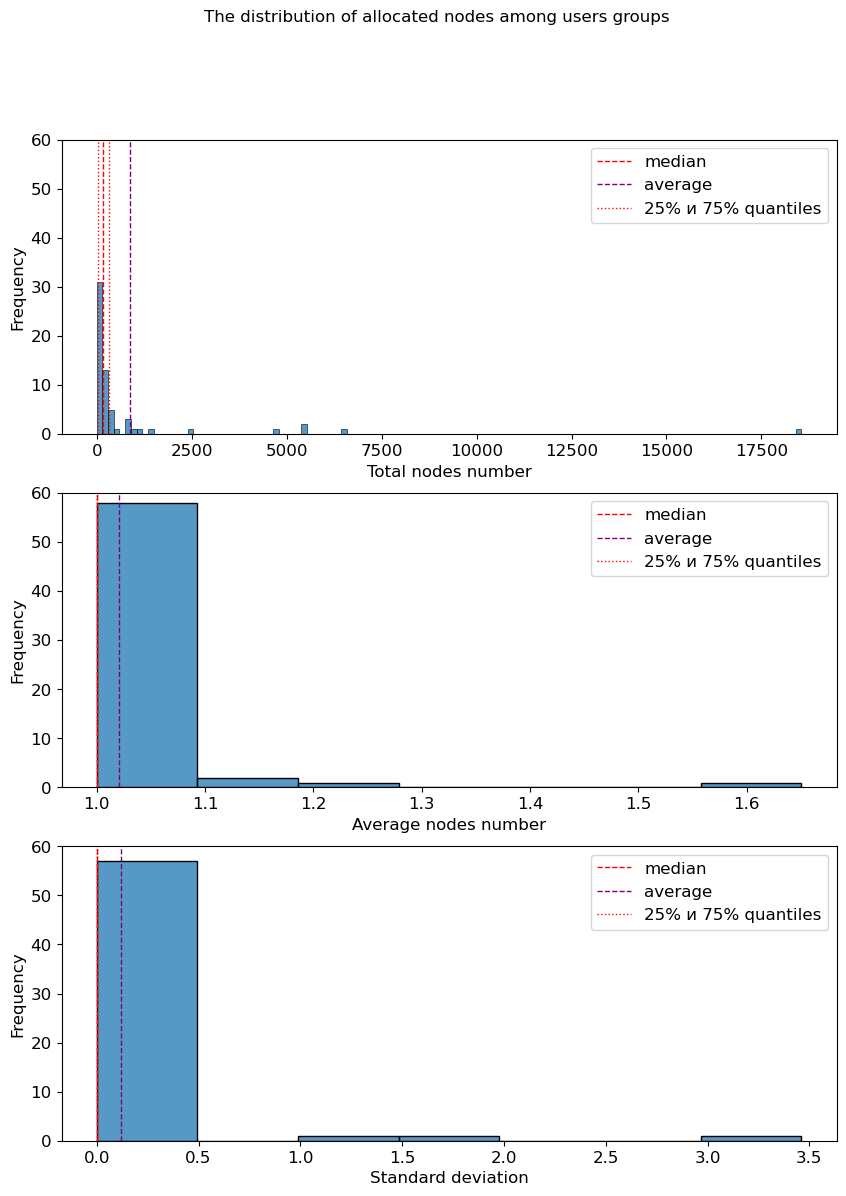

In [105]:
attribute_distribution_3plots(groups_stat_nongeo, 'The distribution of allocated nodes among users groups', 60, \
                             'AllocNodes_sum', 'Total nodes number', 'Nodes_mean', 'Average nodes number', \
                            'Nodes_std', 'Standard deviation')

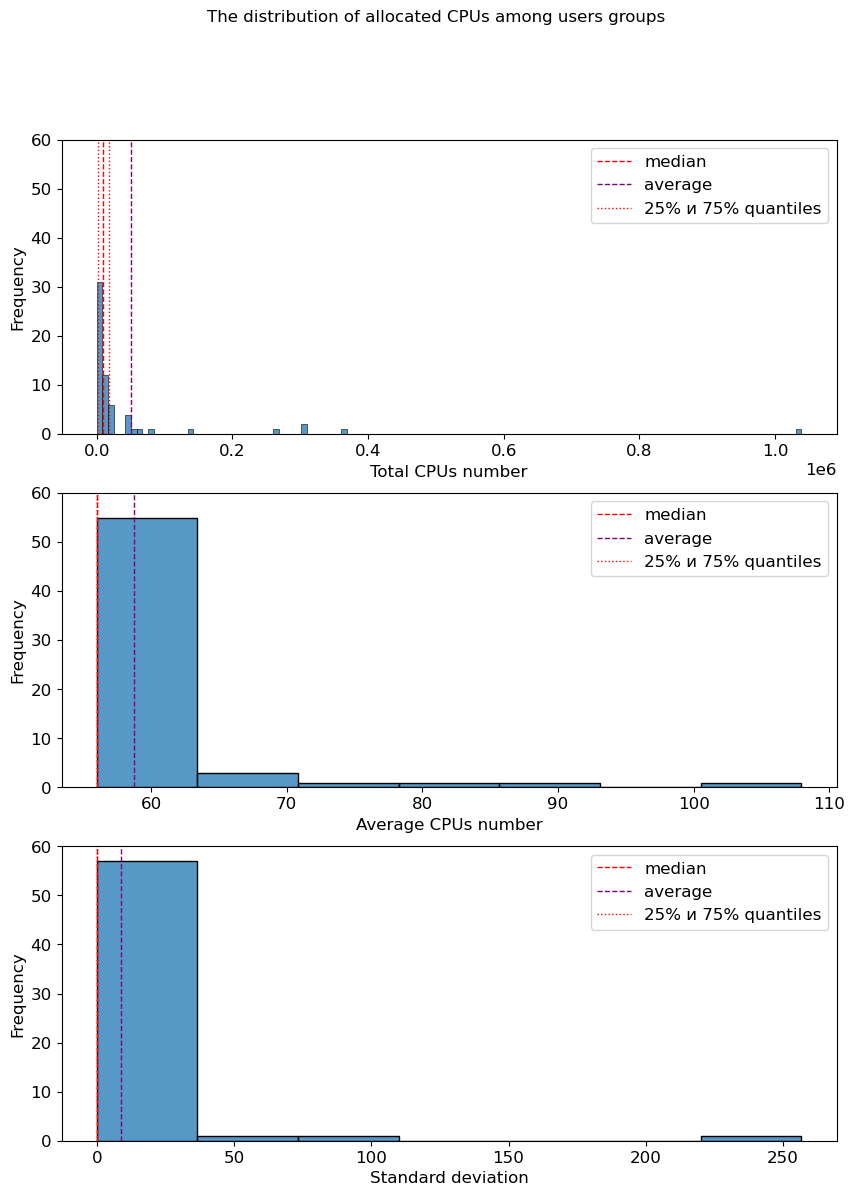

In [106]:
attribute_distribution_3plots(groups_stat_nongeo, 'The distribution of allocated CPUs among users groups', 60, \
                             'AllocCPUS_sum', 'Total CPUs number', 'CPUs_mean', 'Average CPUs number', \
                            'CPUs_std', 'Standard deviation')

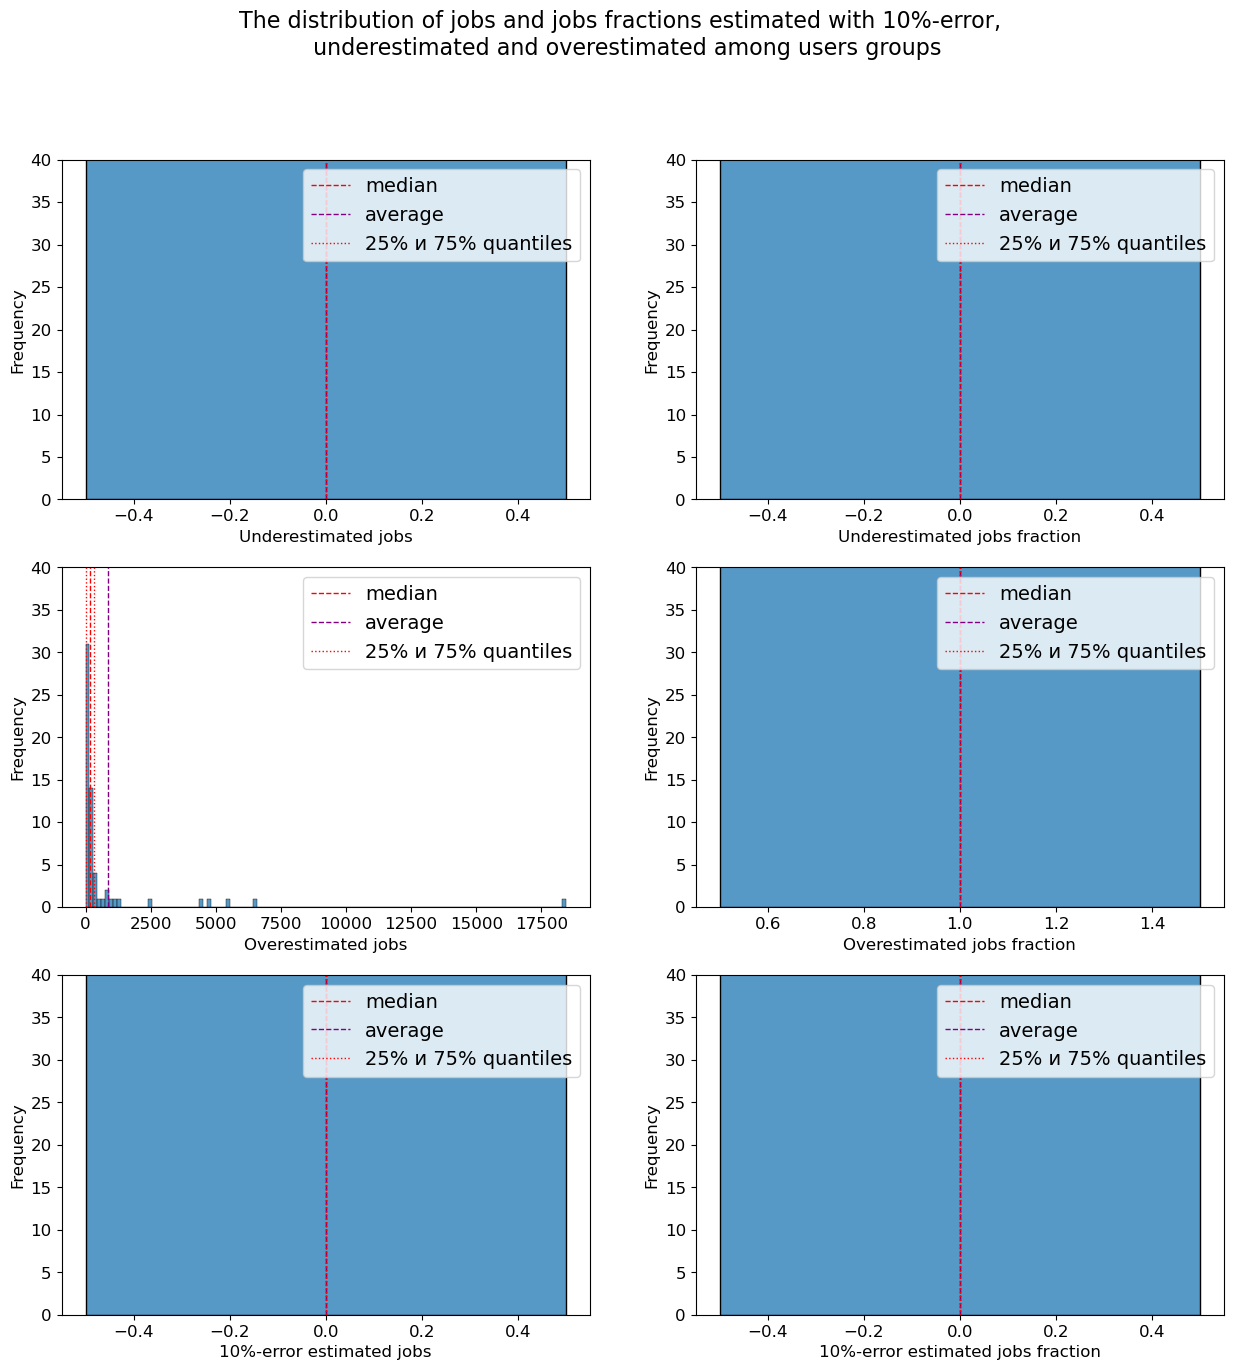

In [107]:
attribute_distribution_6plots(groups_stat_nongeo,\
                              'The distribution of jobs and jobs fractions estimated with 10%-error, \n underestimated and overestimated among users groups', \
                              40, 'UnderTime', 'Underestimated jobs', 'UnderTimeFrac', 'Underestimated jobs fraction', \
                                'OverTime', 'Overestimated jobs', 'OverTimeFrac', 'Overestimated jobs fraction',\
                             '10%error', '10%-error estimated jobs', '10%errorFrac', '10%-error estimated jobs fraction')

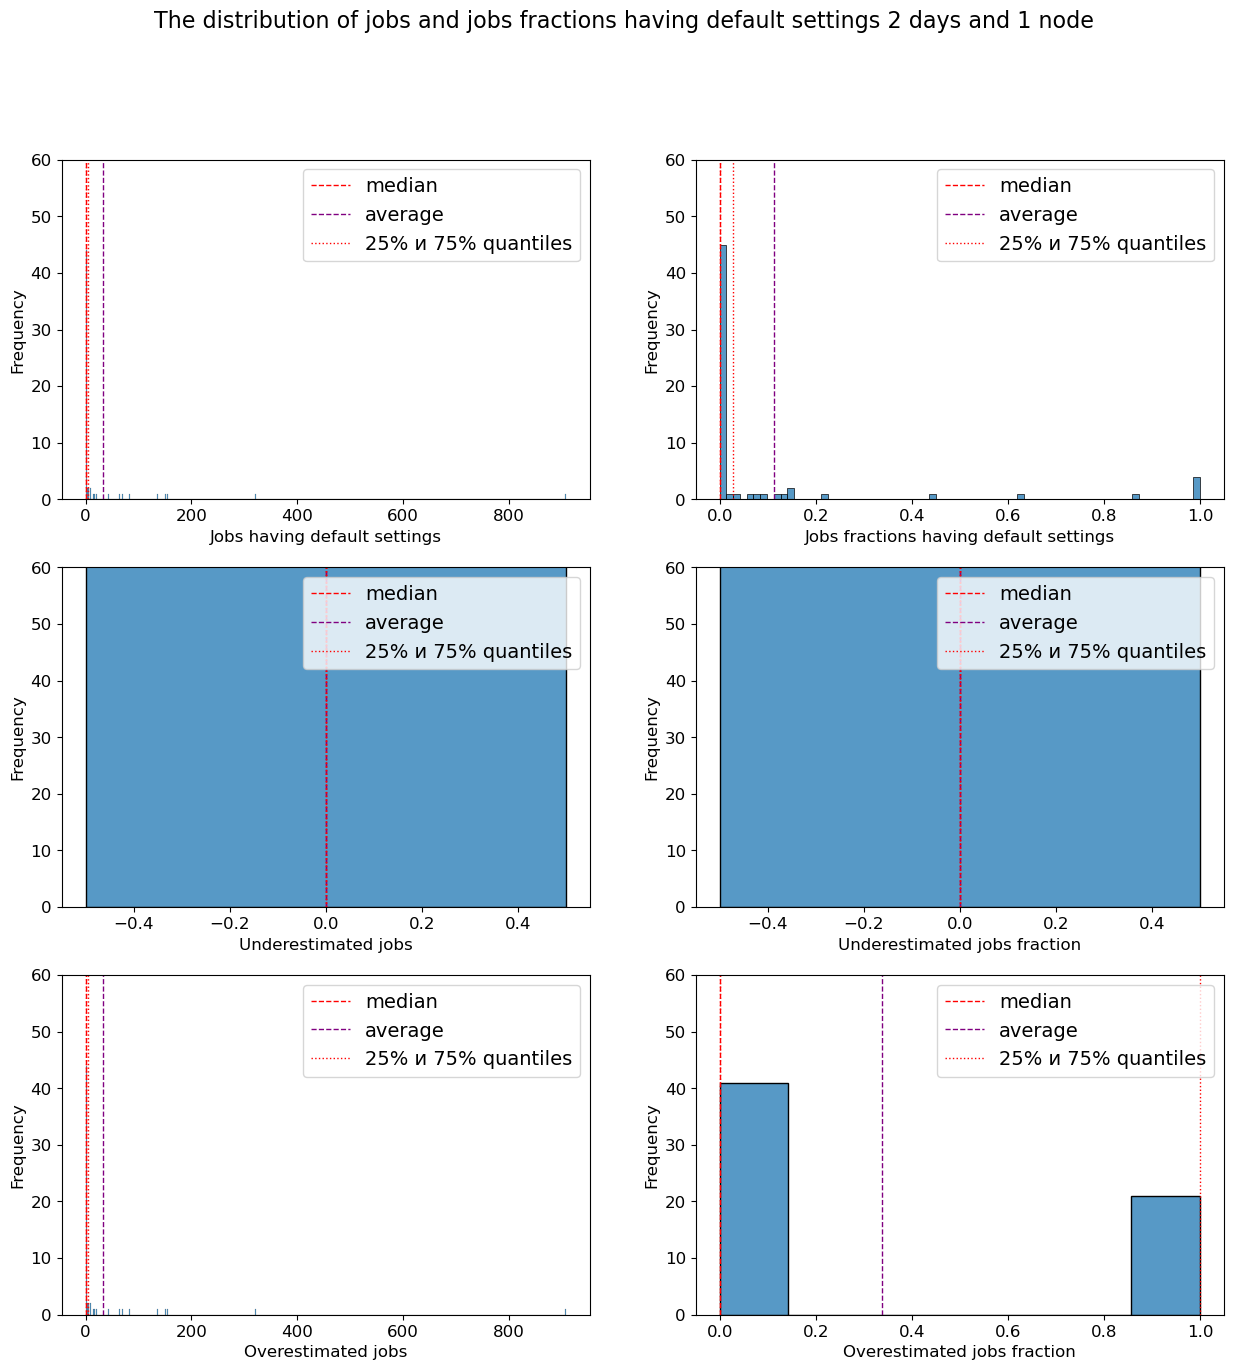

In [140]:
attribute_distribution_6plots(groups_stat_nongeo, 'The distribution of jobs and jobs fractions having default settings 2 days and 1 node', \
                              60, 'DefaultJobs', 'Jobs having default settings', 'DefaultFrac', \
                              'Jobs fractions having default settings', 'UnderJobs', 'Underestimated jobs',\
                              'UnderFrac', 'Underestimated jobs fraction', 'OverJobs', 'Overestimated jobs', 'OverFrac', \
                              'Overestimated jobs fraction')

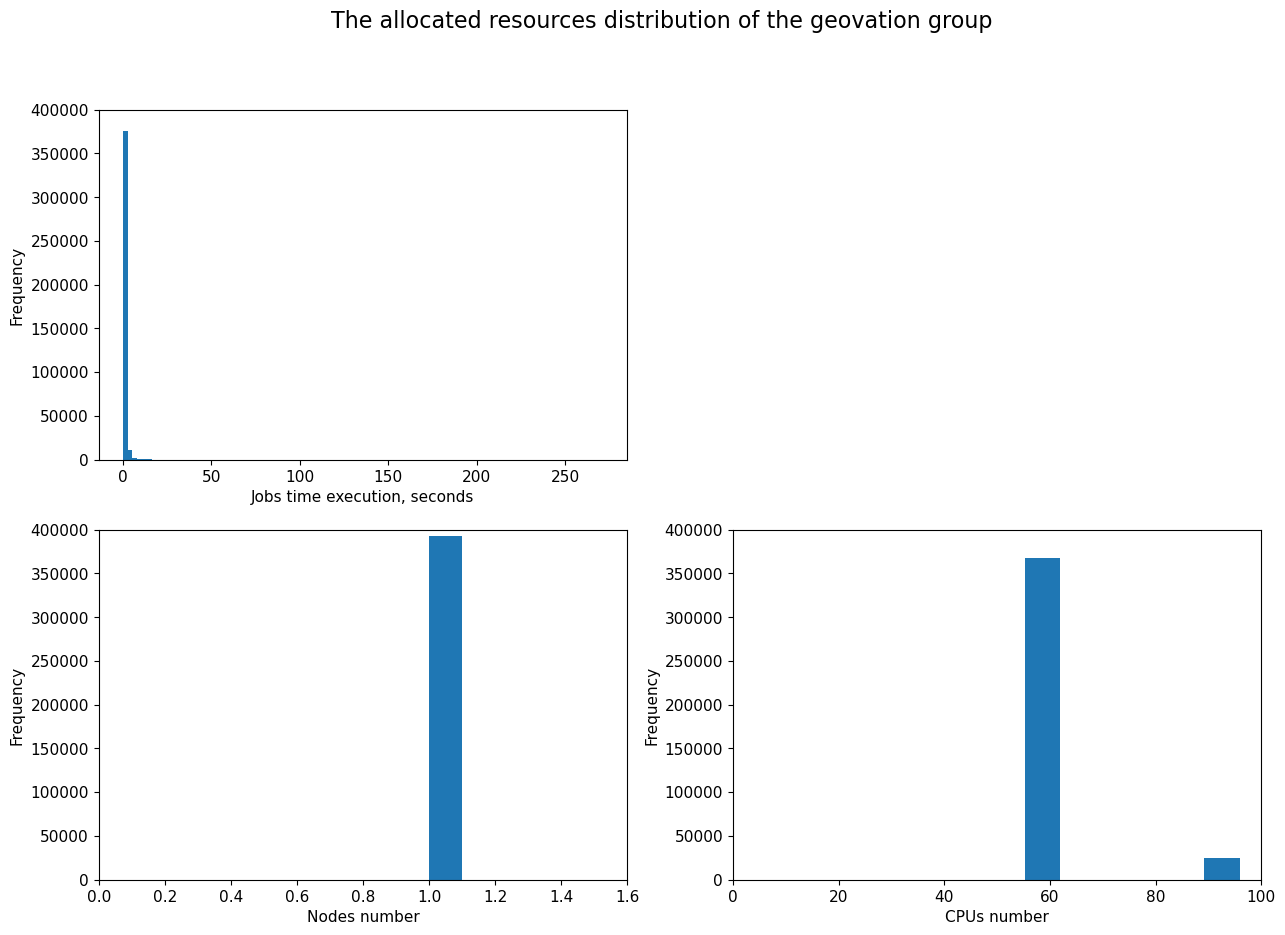

In [157]:
geovation_group = data[data.Group == 'geovation']
geovation_distributions(geovation_group, 'The allocated resources distribution of the geovation group', \
                        'ElapsedRaw', 'Jobs time execution, seconds', 'AllocNodes', 'Nodes number', \
                                'AllocCPUS', 'CPUs number')

In [110]:
groups_stat_geovation = groups_stat[groups_stat.Group == 'geovation'].set_index('Group')
groups_stat_geovation_estim = groups_stat_geovation[['UnderTimeFrac', 'OverTimeFrac', '10%errorFrac', 'DefaultFrac', \
                                                    'UnderFrac', 'OverFrac']]
groups_stat_geovation_estim

UnderTimeFrac  OverTimeFrac  10%errorFrac  DefaultFrac  UnderFrac  \
Group                                                                          
geovation            0.0           1.0           0.0     0.982884        0.0   

           OverFrac  
Group                
geovation       1.0

#### Users investigation

In [141]:
# statistics computation

users_stat = statistics(data[data.Group!='geovation'], 'User')
users_stat

User  ElapsedRaw_sum  AllocNodes_sum  AllocCPUS_sum  Jobs  \
0     aazakharov      273.418056             144           8064   144   
1    adanilishin      690.392778             494          27664   494   
2            aep      274.182500              17            952    17   
3        afrolov       30.083056              10            560    10   
4      agarbaruk    16763.800556             980          54880   980   
..           ...             ...             ...            ...   ...   
132      vstanin       18.714167              56           3136    56   
133     yerokhin     1524.946667              53           2968    53   
134      yu_adam       30.933889               8            448     8   
135   zasimovama      888.671111              12            672    12   
136       zhukov       40.727778              10            560    10   

     ExecTime_mean  ExecTime_std  ExecTime_med  ExecTime_perc25  \
0         1.898736      2.973462      0.218472         0.014306   
1         1.397556      2.023037      0.916250         0.413403   
2        16.128382     18.576501      5.657500         0.912778   
3         3.008306      7.218500      0.003611         0.002847   
4        17.105919     47.113566      2.195139         0.600972   
..             ...           ...           ...              ...   
132       0.334182      0.642188      0.078333         0.009167   
133      28.772579     19.783781     29.736944        11.583611   
134       3.866736      3.395281      4.502361         0.341111   
135      74.055926     89.765464     63.305139        25.244514   
136       4.072778      7.667929      0.221250         0.072569   

     ExecTime_perc75  ...  OverTime  OverTimeFrac  10%error  10%errorFrac  \
0           1.834514  ...       144           1.0         0           0.0   
1           1.387500  ...       494           1.0         0           0.0   
2          35.441944  ...        17           1.0         0           0.0   
3           0.528542  ...        10           1.0         0           0.0   
4          10.485069  ...       980           1.0         0           0.0   
..               ...  ...       ...           ...       ...           ...   
132         0.167778  ...        56           1.0         0           0.0   
133        39.678889  ...        53           1.0         0           0.0   
134         5.285069  ...         8           1.0         0           0.0   
135        84.561736  ...        12           1.0         0           0.0   
136         1.824236  ...        10           1.0         0           0.0   

     DefaultJobs  DefaultFrac  UnderJobs  UnderFrac  OverJobs  OverFrac  
0              0     0.000000          0        0.0         0       0.0  
1            472     0.955466          0        0.0       472       1.0  
2              0     0.000000          0        0.0         0       0.0  
3              0     0.000000          0        0.0         0       0.0  
4              0     0.000000          0        0.0         0       0.0  
..           ...          ...        ...        ...       ...       ...  
132            0     0.000000          0        0.0         0       0.0  
133            0     0.000000          0        0.0         0       0.0  
134            4     0.500000          0        0.0         4       1.0  
135            1     0.083333          0        0.0         1       1.0  
136            2     0.200000          0        0.0         2       1.0  

[137 rows x 29 columns]

In [142]:
# statistics computation for the users of the geovation group 

geovation_users_stat = statistics(data[data.Group=='geovation'], 'User')
geovation_users_stat

User  ElapsedRaw_sum  AllocNodes_sum  AllocCPUS_sum    Jobs  \
0  bronskiy    48786.589722           45096        2654056   45096   
1    degtam       84.054722              11            736      11   
2     eapra    11603.605556           41967        2581432   41967   
3   g2admin       43.921111               1             56       1   
4    gramsn    97752.453611          163621        9466656  163621   
5   kibalch     6113.477222           12480         698880   12480   
6    litvda    52347.507500           13703         790048   13703   
7    pervms     8574.530278           70172        3929632   70172   
8   tinakin    31037.264722           45268        2843132   45268   

   ExecTime_mean  ExecTime_std  ExecTime_med  ExecTime_perc25  \
0       1.081839      4.570525      0.250833         0.061389   
1       7.641338     16.864329      0.009722         0.001389   
2       0.276494      1.312549      0.050556         0.022222   
3      43.921111           NaN     43.921111        43.921111   
4       0.597432      1.628049      0.093056         0.029167   
5       0.489862      1.647083      0.150278         0.071389   
6       3.820149     17.678073      0.122778         0.039167   
7       0.122193      0.669261      0.035278         0.024167   
8       0.685634      2.082106      0.240833         0.068264   

   ExecTime_perc75  ...  OverTime  OverTimeFrac  10%error  10%errorFrac  \
0         0.823958  ...     45096           1.0         0           0.0   
1         0.302361  ...        11           1.0         0           0.0   
2         0.165833  ...     41967           1.0         0           0.0   
3        43.921111  ...         1           1.0         0           0.0   
4         0.436389  ...    163621           1.0         0           0.0   
5         0.467708  ...     12480           1.0         0           0.0   
6         0.604444  ...     13703           1.0         0           0.0   
7         0.063889  ...     70172           1.0         0           0.0   
8         0.675903  ...     45268           1.0         0           0.0   

   DefaultJobs  DefaultFrac  UnderJobs  UnderFrac  OverJobs  OverFrac  
0        44929     0.996297          0        0.0     44929       1.0  
1            9     0.818182          0        0.0         9       1.0  
2        41313     0.984416          0        0.0     41313       1.0  
3            1     1.000000          0        0.0         1       1.0  
4       163412     0.998723          0        0.0    163412       1.0  
5        11248     0.901282          0        0.0     11248       1.0  
6         9294     0.678246          0        0.0      9294       1.0  
7        70164     0.999886          0        0.0     70164       1.0  
8        45234     0.999249          0        0.0     45234       1.0  

[9 rows x 29 columns]

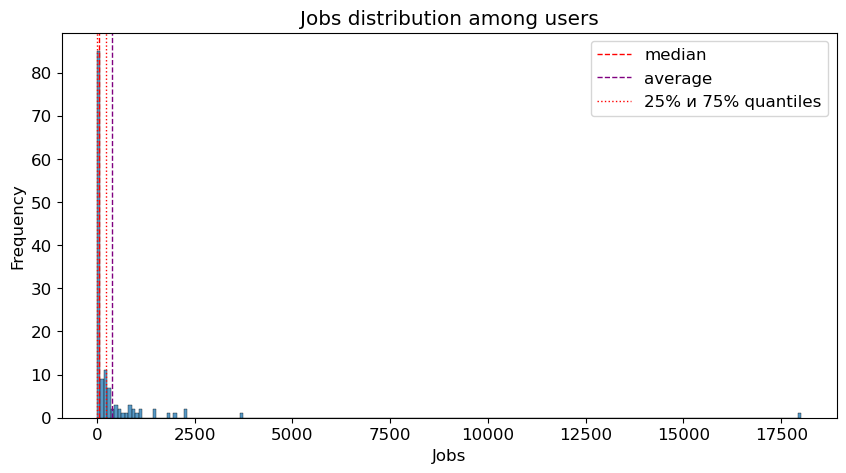

In [113]:
attribute_distribution_stats(users_stat, 'Jobs', 'Jobs', 'Jobs distribution among users')

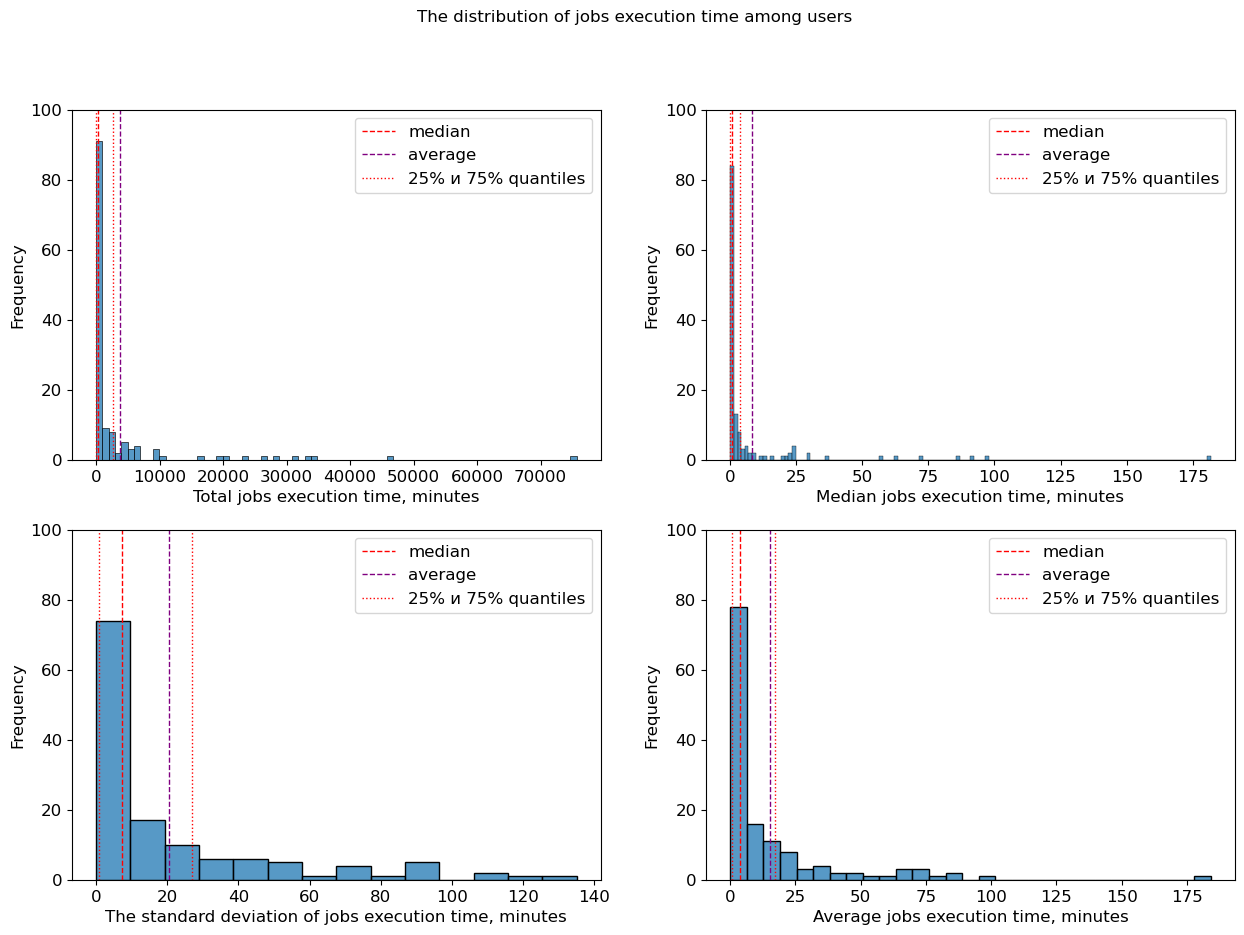

In [114]:
attribute_distribution_4plots(users_stat, 'The distribution of jobs execution time among users', 100, \
                             'ElapsedRaw_sum', 'Total jobs execution time, minutes', \
                            'ExecTime_med', 'Median jobs execution time, minutes', \
                            'ExecTime_std', 'The standard deviation of jobs execution time, minutes', \
                       'ExecTime_mean', 'Average jobs execution time, minutes')

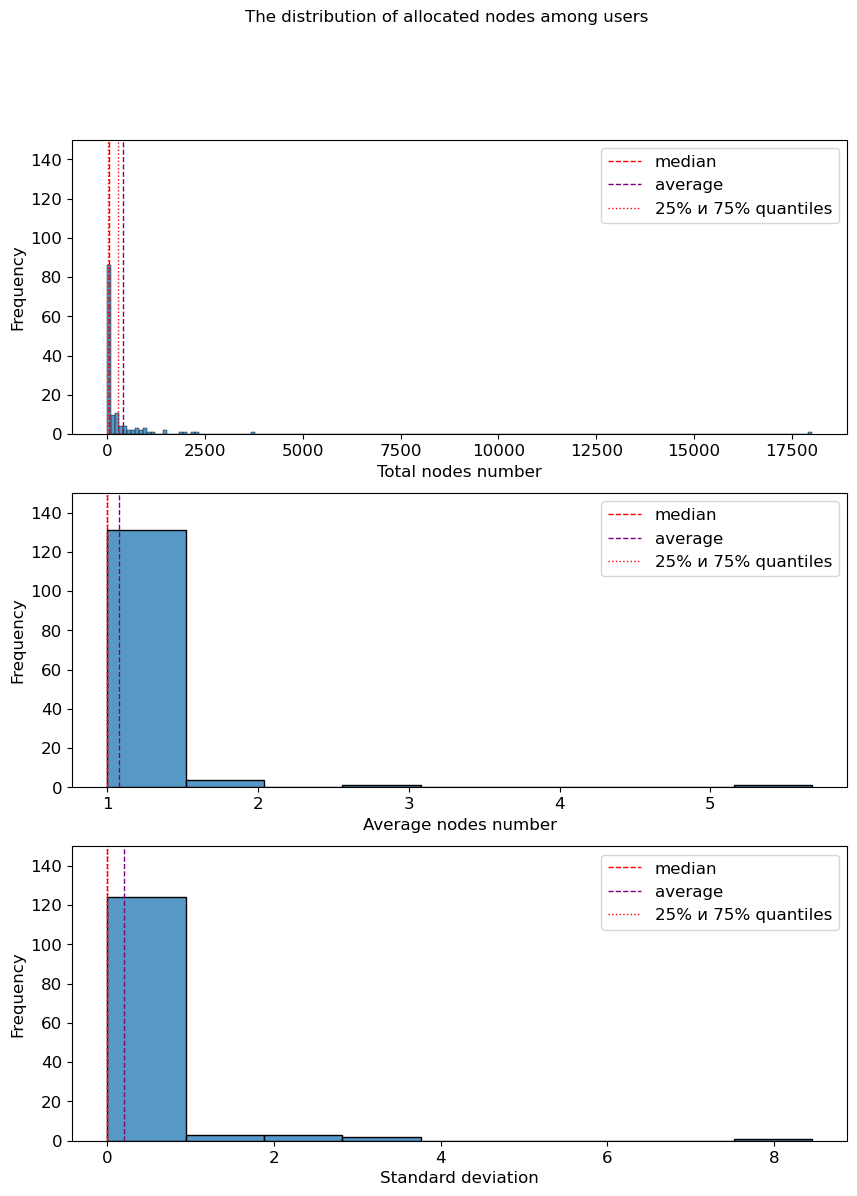

In [115]:
attribute_distribution_3plots(users_stat, 'The distribution of allocated nodes among users', 150, \
                             'AllocNodes_sum', 'Total nodes number', 'Nodes_mean', 'Average nodes number', \
                            'Nodes_std', 'Standard deviation')

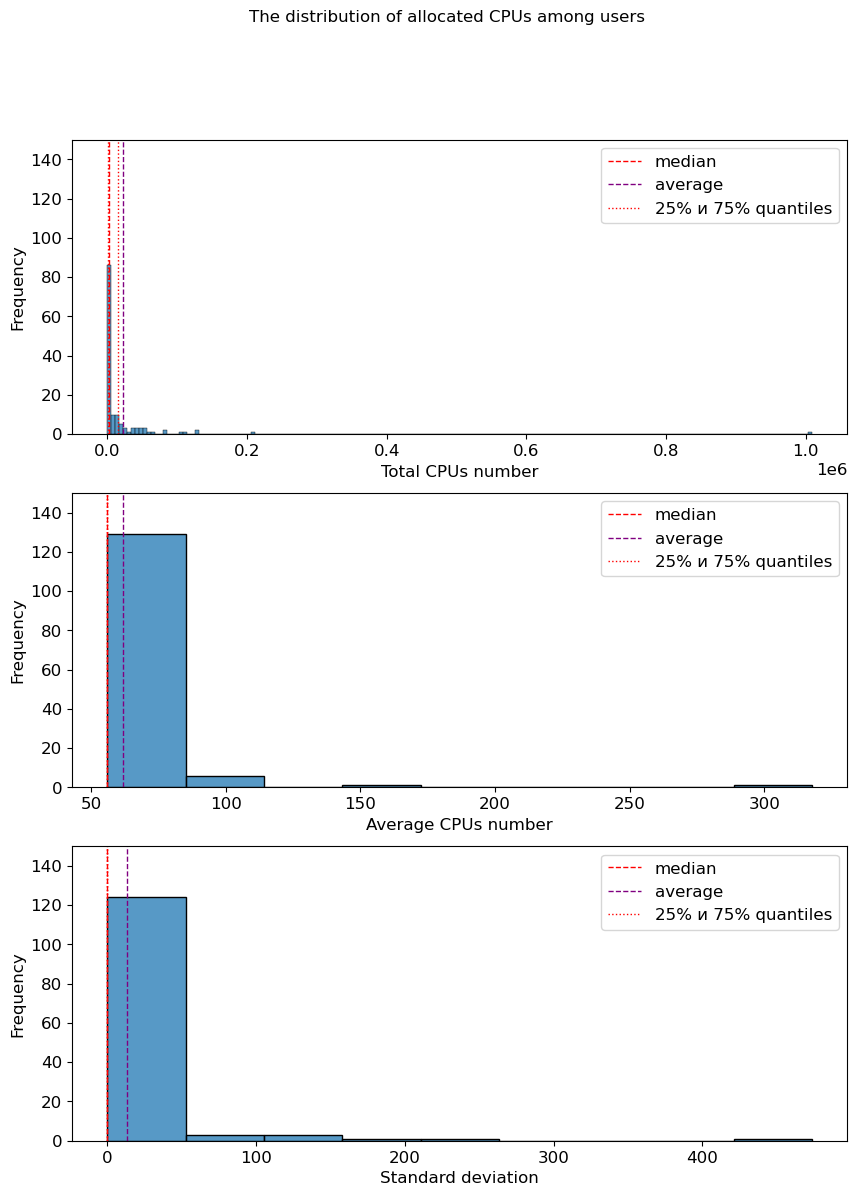

In [116]:
attribute_distribution_3plots(users_stat, 'The distribution of allocated CPUs among users', 150, \
                             'AllocCPUS_sum', 'Total CPUs number', 'CPUs_mean', 'Average CPUs number', \
                            'CPUs_std', 'Standard deviation')

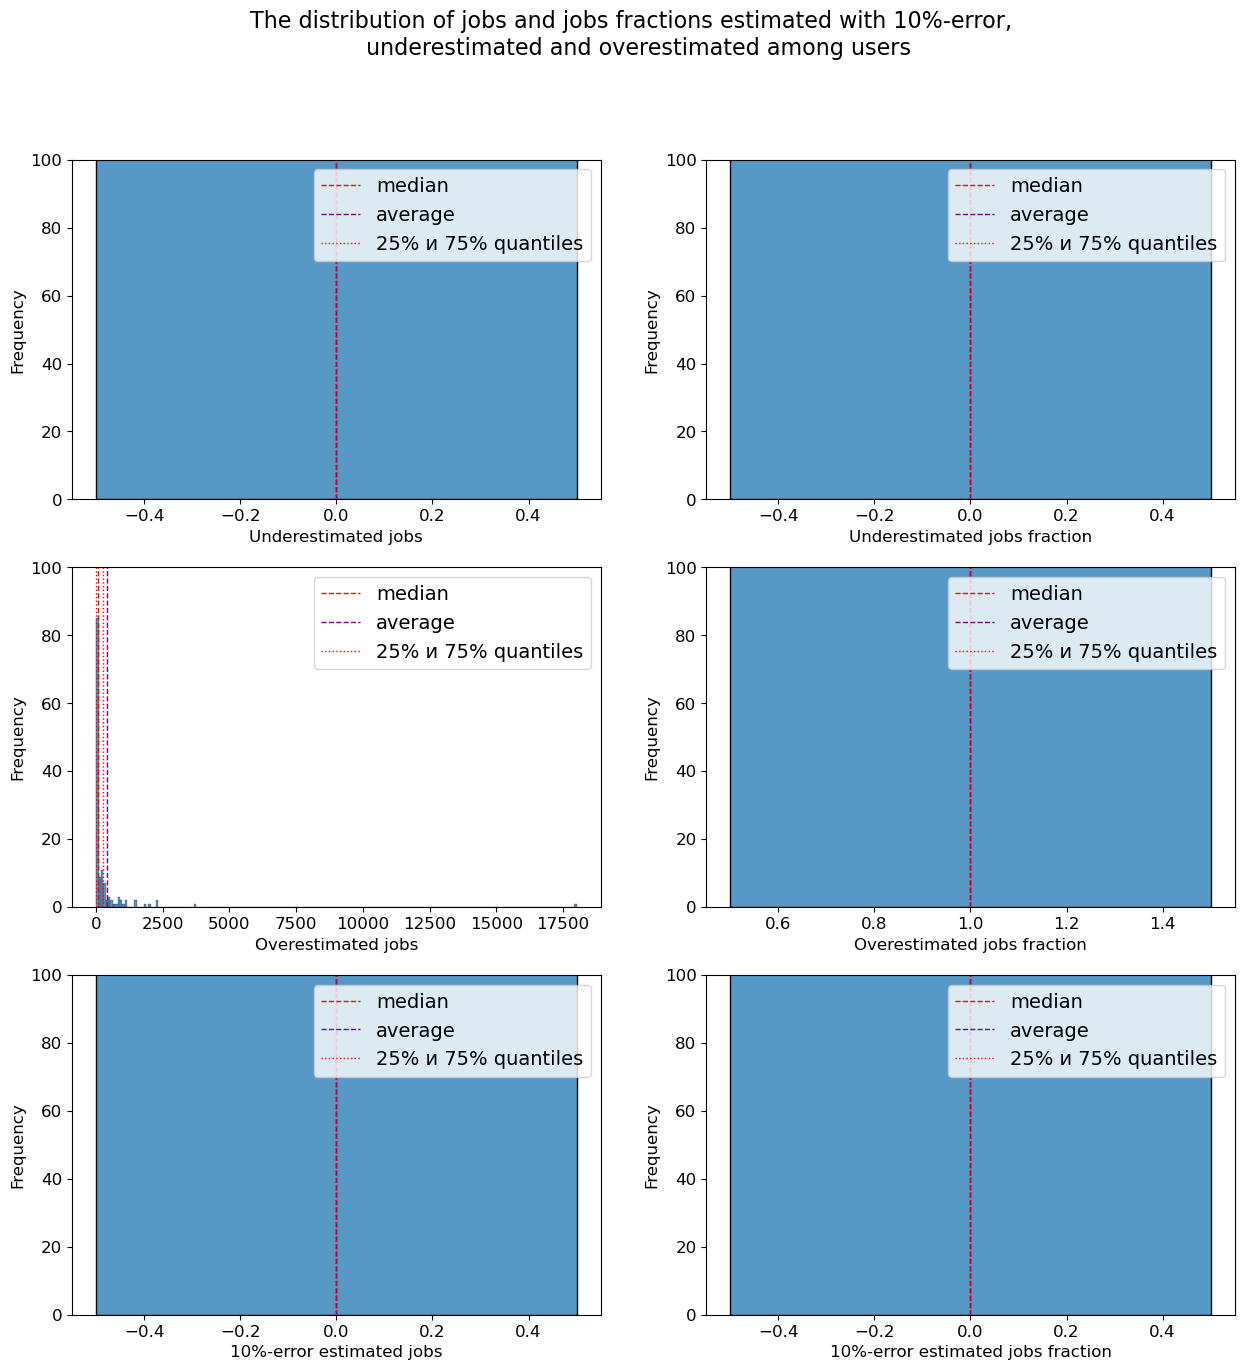

In [117]:
attribute_distribution_6plots(users_stat,\
                              'The distribution of jobs and jobs fractions estimated with 10%-error, \n underestimated and overestimated among users', \
                              100, 'UnderTime', 'Underestimated jobs', 'UnderTimeFrac', 'Underestimated jobs fraction', \
                                'OverTime', 'Overestimated jobs', 'OverTimeFrac', 'Overestimated jobs fraction',\
                             '10%error', '10%-error estimated jobs', '10%errorFrac', '10%-error estimated jobs fraction')

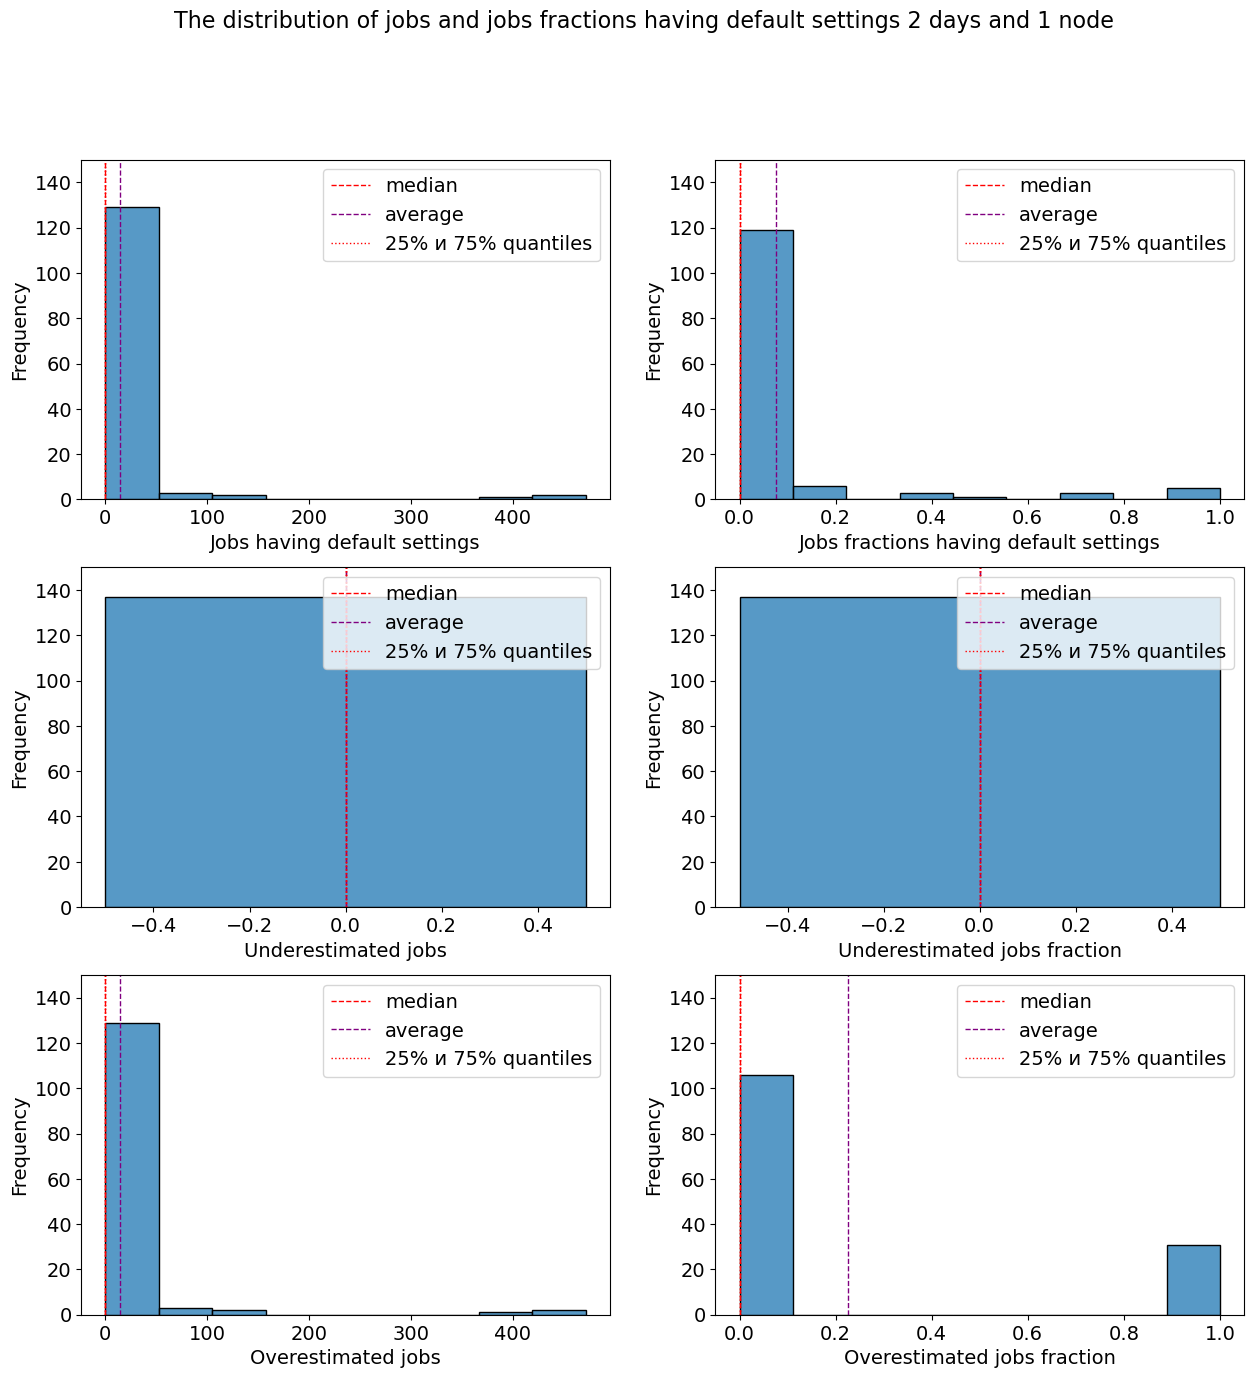

In [143]:
attribute_distribution_6plots(users_stat, 'The distribution of jobs and jobs fractions having default settings 2 days and 1 node', \
                              150, 'DefaultJobs', 'Jobs having default settings', 'DefaultFrac', \
                              'Jobs fractions having default settings', 'UnderJobs', 'Underestimated jobs',\
                              'UnderFrac', 'Underestimated jobs fraction', 'OverJobs', 'Overestimated jobs', 'OverFrac', \
                              'Overestimated jobs fraction')

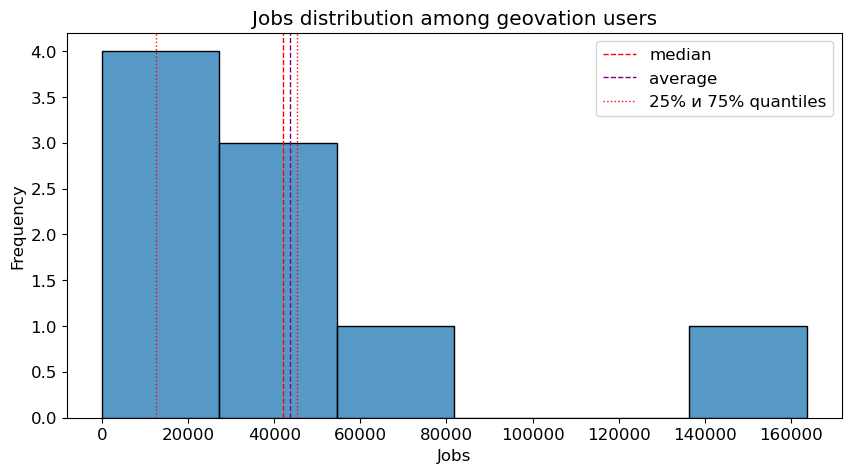

In [119]:
attribute_distribution_stats(geovation_users_stat, 'Jobs', 'Jobs', 'Jobs distribution among geovation users')

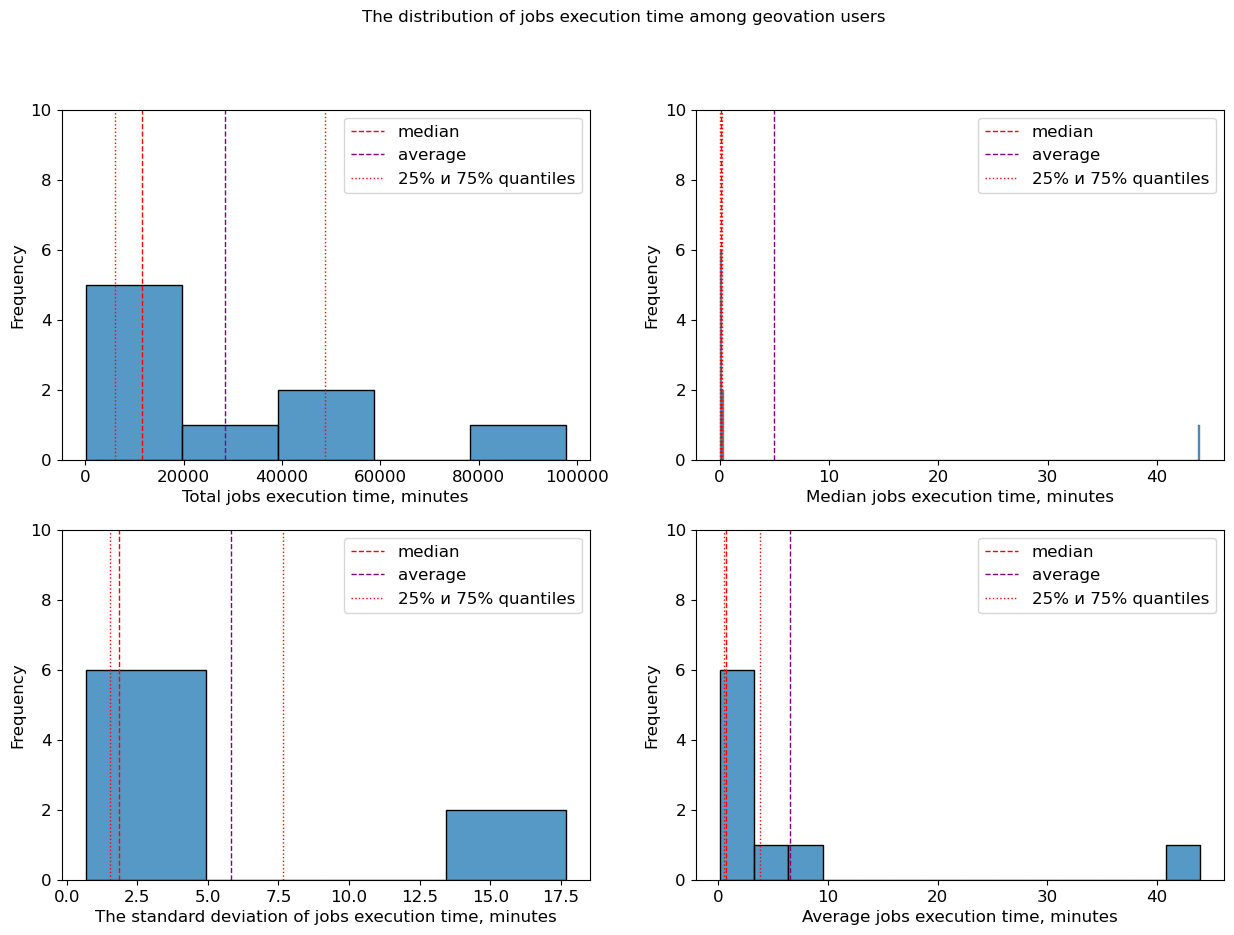

In [120]:
attribute_distribution_4plots(geovation_users_stat, 'The distribution of jobs execution time among geovation users', 10, \
                             'ElapsedRaw_sum', 'Total jobs execution time, minutes', \
                            'ExecTime_med', 'Median jobs execution time, minutes', \
                            'ExecTime_std', 'The standard deviation of jobs execution time, minutes', \
                       'ExecTime_mean', 'Average jobs execution time, minutes')

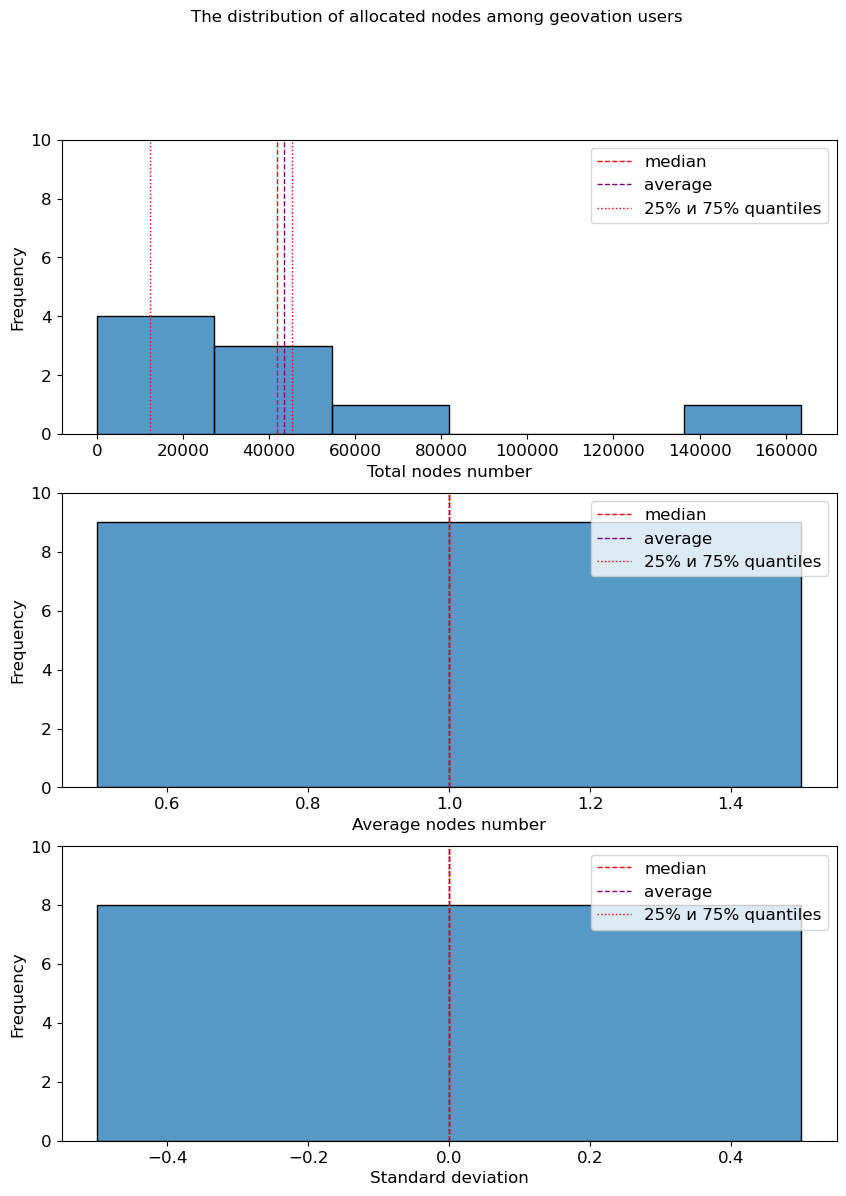

In [121]:
attribute_distribution_3plots(geovation_users_stat, 'The distribution of allocated nodes among geovation users', 10, \
                             'AllocNodes_sum', 'Total nodes number', 'Nodes_mean', 'Average nodes number', \
                            'Nodes_std', 'Standard deviation')

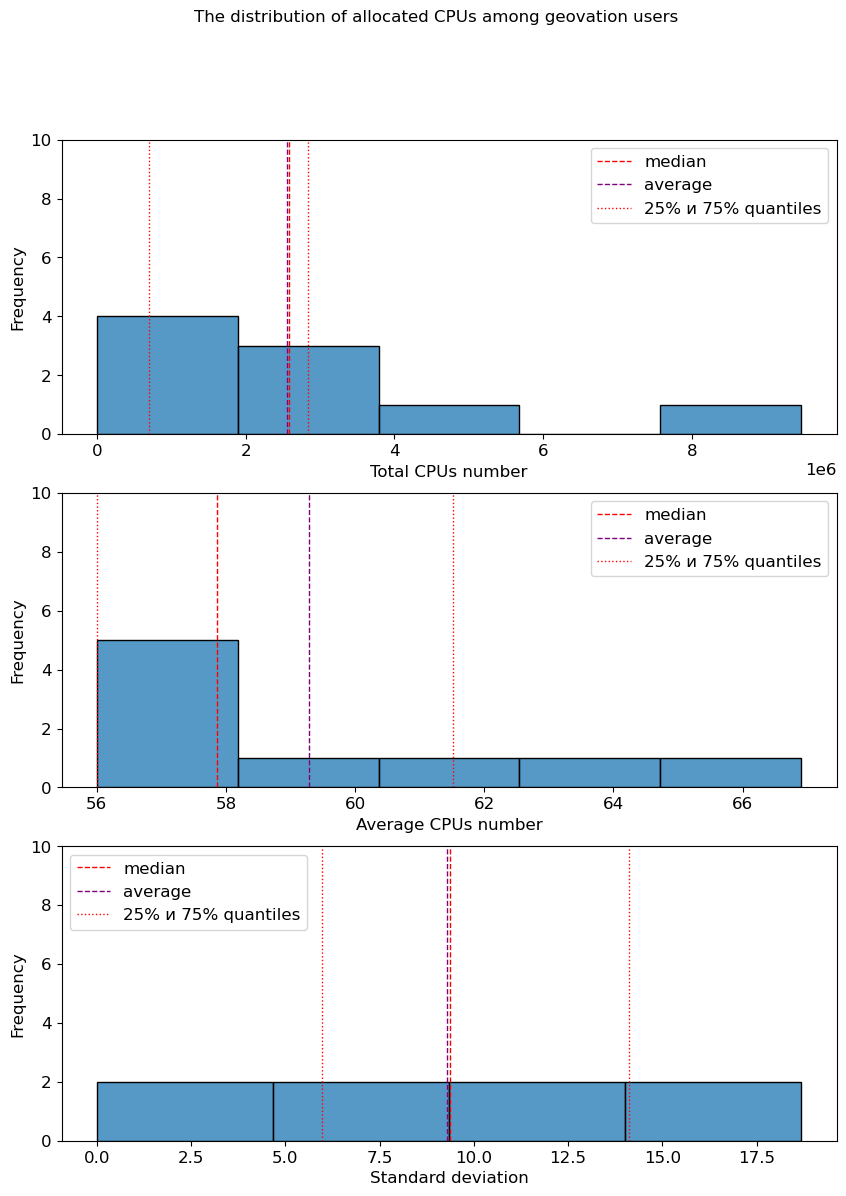

In [122]:
attribute_distribution_3plots(geovation_users_stat, 'The distribution of allocated CPUs among geovation users', 10, \
                             'AllocCPUS_sum', 'Total CPUs number', 'CPUs_mean', 'Average CPUs number', \
                            'CPUs_std', 'Standard deviation')

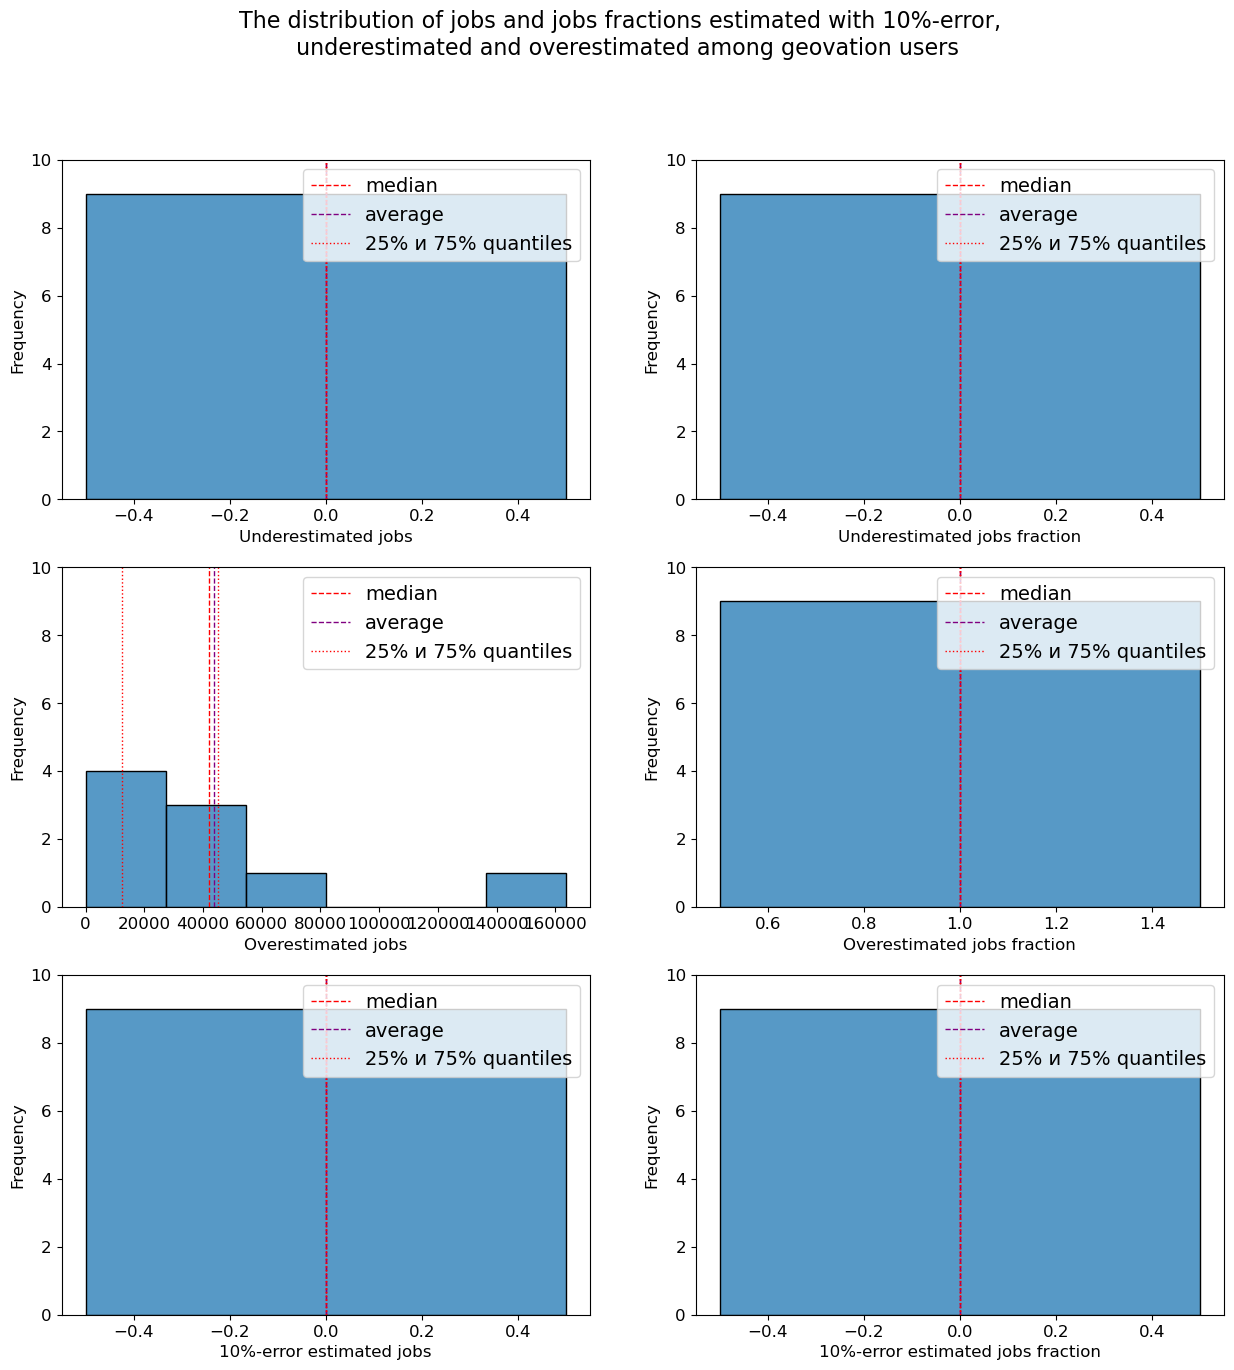

In [123]:
attribute_distribution_6plots(geovation_users_stat, \
                              'The distribution of jobs and jobs fractions estimated with 10%-error, \n underestimated and overestimated among geovation users', \
                              10, 'UnderTime', 'Underestimated jobs', 'UnderTimeFrac', 'Underestimated jobs fraction', \
                                'OverTime', 'Overestimated jobs', 'OverTimeFrac', 'Overestimated jobs fraction',\
                             '10%error', '10%-error estimated jobs', '10%errorFrac', '10%-error estimated jobs fraction')

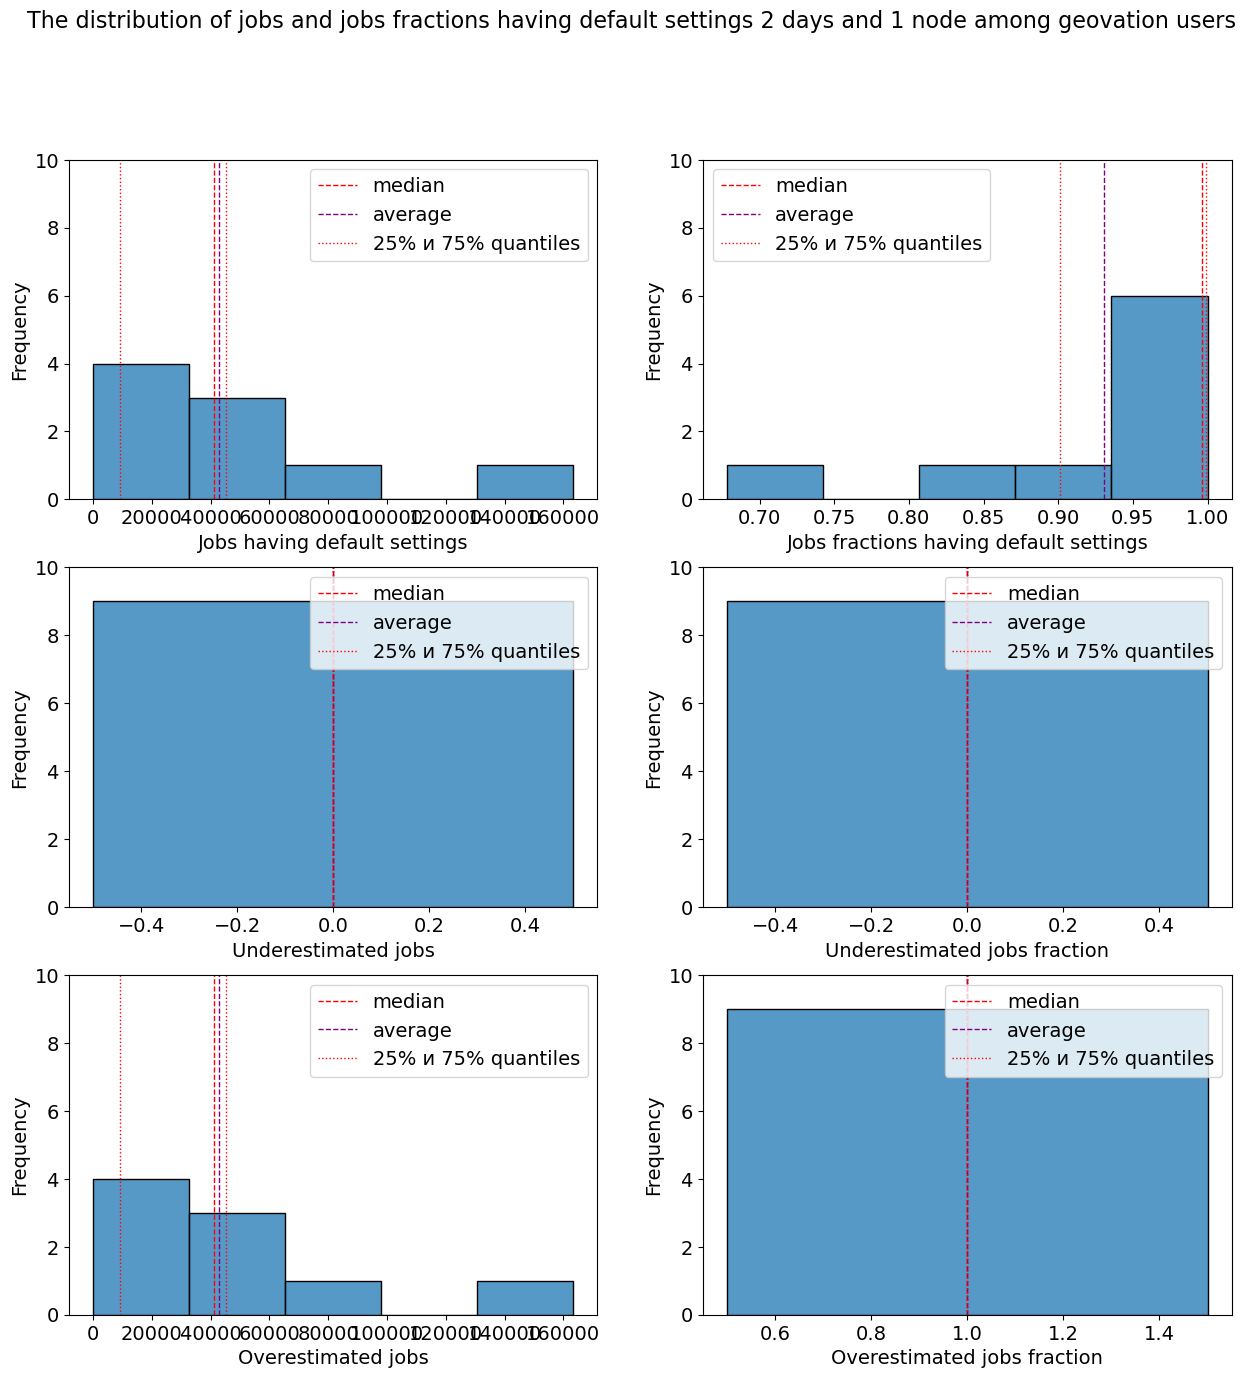

In [144]:
attribute_distribution_6plots(geovation_users_stat, 'The distribution of jobs and jobs fractions having default settings 2 days and 1 node among geovation users', \
                              10, 'DefaultJobs', 'Jobs having default settings', 'DefaultFrac', \
                              'Jobs fractions having default settings', 'UnderJobs', 'Underestimated jobs',\
                              'UnderFrac', 'Underestimated jobs fraction', 'OverJobs', 'Overestimated jobs', 'OverFrac', \
                              'Overestimated jobs fraction')

#### Industries investigation

In [145]:
# statistics computation

industries_stat = statistics(data[data.Group!='geovation'], 'Industry')
industries_stat

Industry  ElapsedRaw_sum  AllocNodes_sum  AllocCPUS_sum  \
0                      IT     4555.503056            1852         109072   
1            astrophysics     4697.743333             331          18536   
2          bioinformatics     6609.978333           18633        1043448   
3              biophysics    61948.757500            5659         316944   
4              energetics     9575.336111            3941         223536   
5              geophysics    40230.348333            1621         109496   
6  mechanical engineering    54959.818889            7144         400264   
7               mechanics    57918.170556            2033         113848   
8                 physics   271975.973889           13471         754376   
9            radiophysics     4348.770833             423          23688   

    Jobs  ExecTime_mean  ExecTime_std  ExecTime_med  ExecTime_perc25  \
0   1848       2.465099      7.525856      0.003333         0.000278   
1    331      14.192578     38.310019      0.061111         0.012500   
2  18523       0.356852      3.149834      0.109167         0.056389   
3   5659      10.946944     21.677616      3.534722         0.100417   
4   3822       2.505321     12.120015      0.095694         0.036389   
5   1621      24.818228     38.518119     10.921944         3.184444   
6   6117       8.984767     31.636552      0.128056         0.010000   
7   1848      31.341001     63.810850      3.260278         0.122569   
8  13468      20.194236     45.096168      0.941806         0.030556   
9    423      10.280782     16.595824      0.294167         0.027778   

   ExecTime_perc75  ...  OverTime  OverTimeFrac  10%error  10%errorFrac  \
0         0.424583  ...      1848           1.0         0           0.0   
1         4.587500  ...       331           1.0         0           0.0   
2         0.170278  ...     18523           1.0         0           0.0   
3        12.901667  ...      5659           1.0         0           0.0   
4         1.038125  ...      3822           1.0         0           0.0   
5        27.210833  ...      1621           1.0         0           0.0   
6         3.449444  ...      6117           1.0         0           0.0   
7        28.984514  ...      1848           1.0         0           0.0   
8        23.674236  ...     13468           1.0         0           0.0   
9        17.122083  ...       423           1.0         0           0.0   

   DefaultJobs  DefaultFrac  UnderJobs  UnderFrac  OverJobs  OverFrac  
0           51     0.027597          0        0.0        51       1.0  
1            0     0.000000          0        0.0         0       0.0  
2            5     0.000270          0        0.0         5       1.0  
3           14     0.002474          0        0.0        14       1.0  
4          589     0.154108          0        0.0       589       1.0  
5            0     0.000000          0        0.0         0       0.0  
6          224     0.036619          0        0.0       224       1.0  
7          155     0.083874          0        0.0       155       1.0  
8          974     0.072320          0        0.0       974       1.0  
9            0     0.000000          0        0.0         0       0.0  

[10 rows x 29 columns]

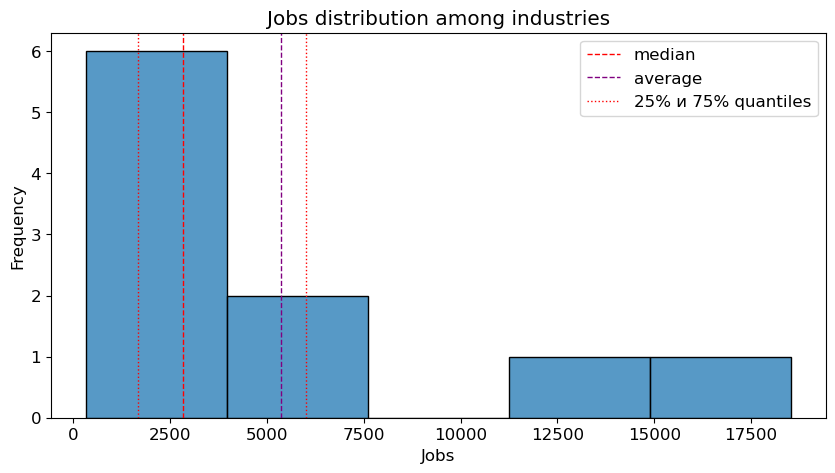

In [126]:
attribute_distribution_stats(industries_stat, 'Jobs', 'Jobs', 'Jobs distribution among industries')

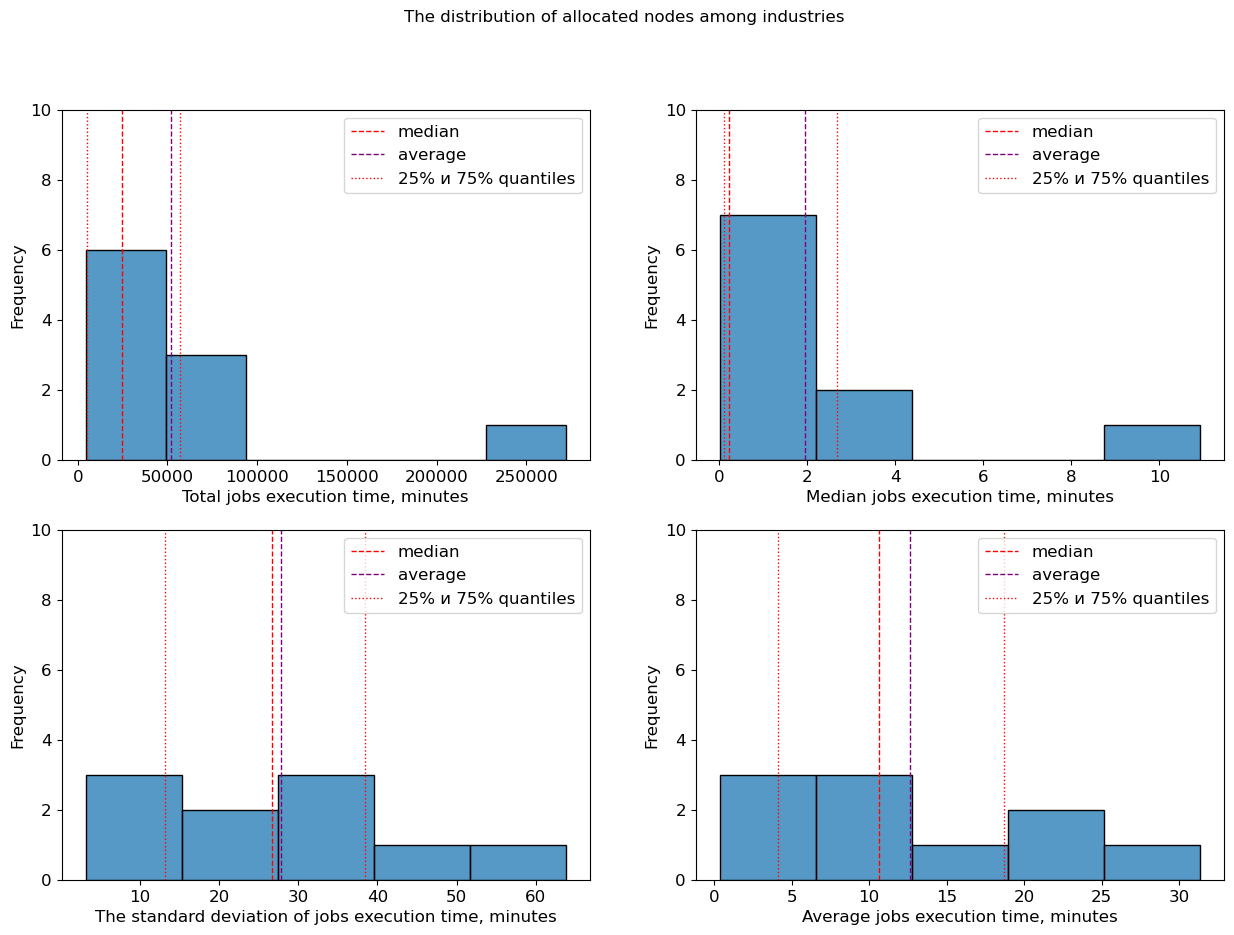

In [127]:
attribute_distribution_4plots(industries_stat, 'The distribution of allocated nodes among industries', 10, \
                          'ElapsedRaw_sum', 'Total jobs execution time, minutes', \
                            'ExecTime_med', 'Median jobs execution time, minutes', \
                            'ExecTime_std', 'The standard deviation of jobs execution time, minutes', \
                       'ExecTime_mean', 'Average jobs execution time, minutes')

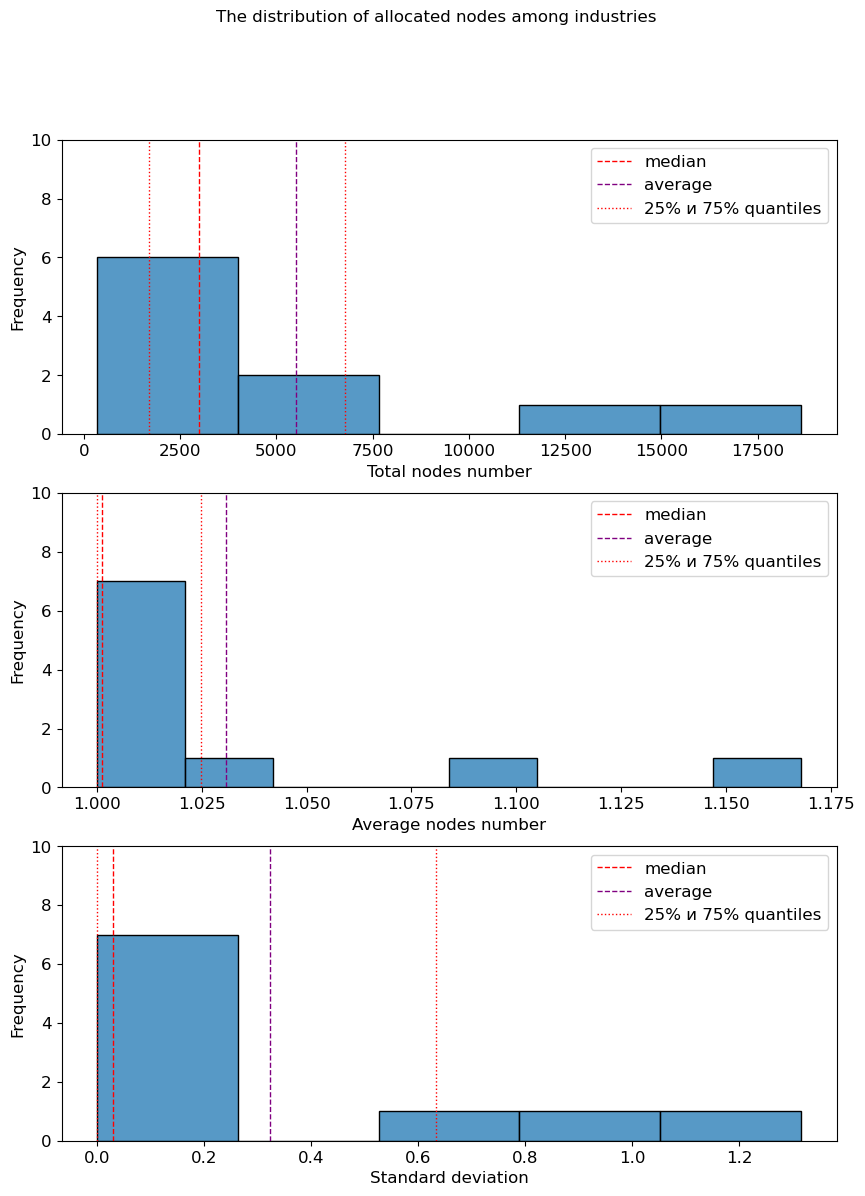

In [128]:
attribute_distribution_3plots(industries_stat, 'The distribution of allocated nodes among industries', 10, \
                             'AllocNodes_sum', 'Total nodes number', 'Nodes_mean', 'Average nodes number', \
                            'Nodes_std', 'Standard deviation')

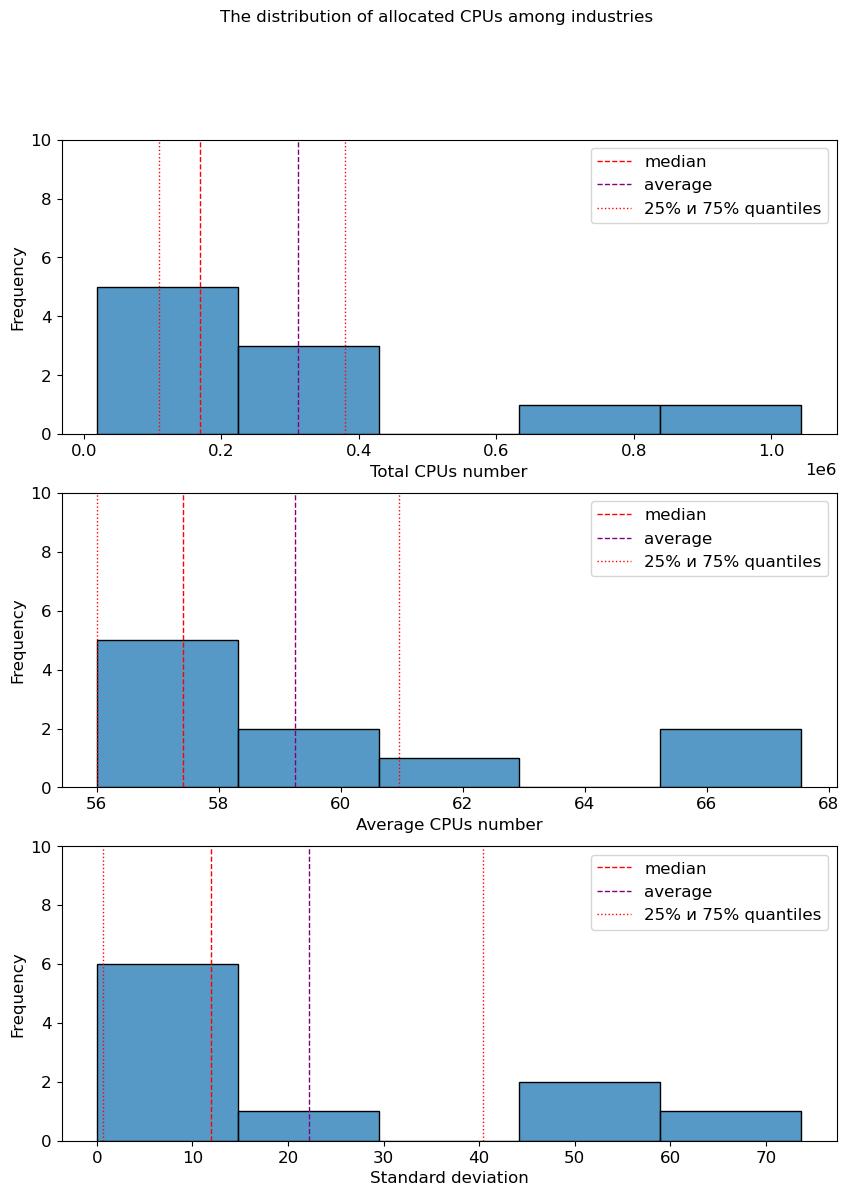

In [129]:
attribute_distribution_3plots(industries_stat, 'The distribution of allocated CPUs among industries', 10, \
                             'AllocCPUS_sum', 'Total CPUs number', 'CPUs_mean', 'Average CPUs number', \
                            'CPUs_std', 'Standard deviation')

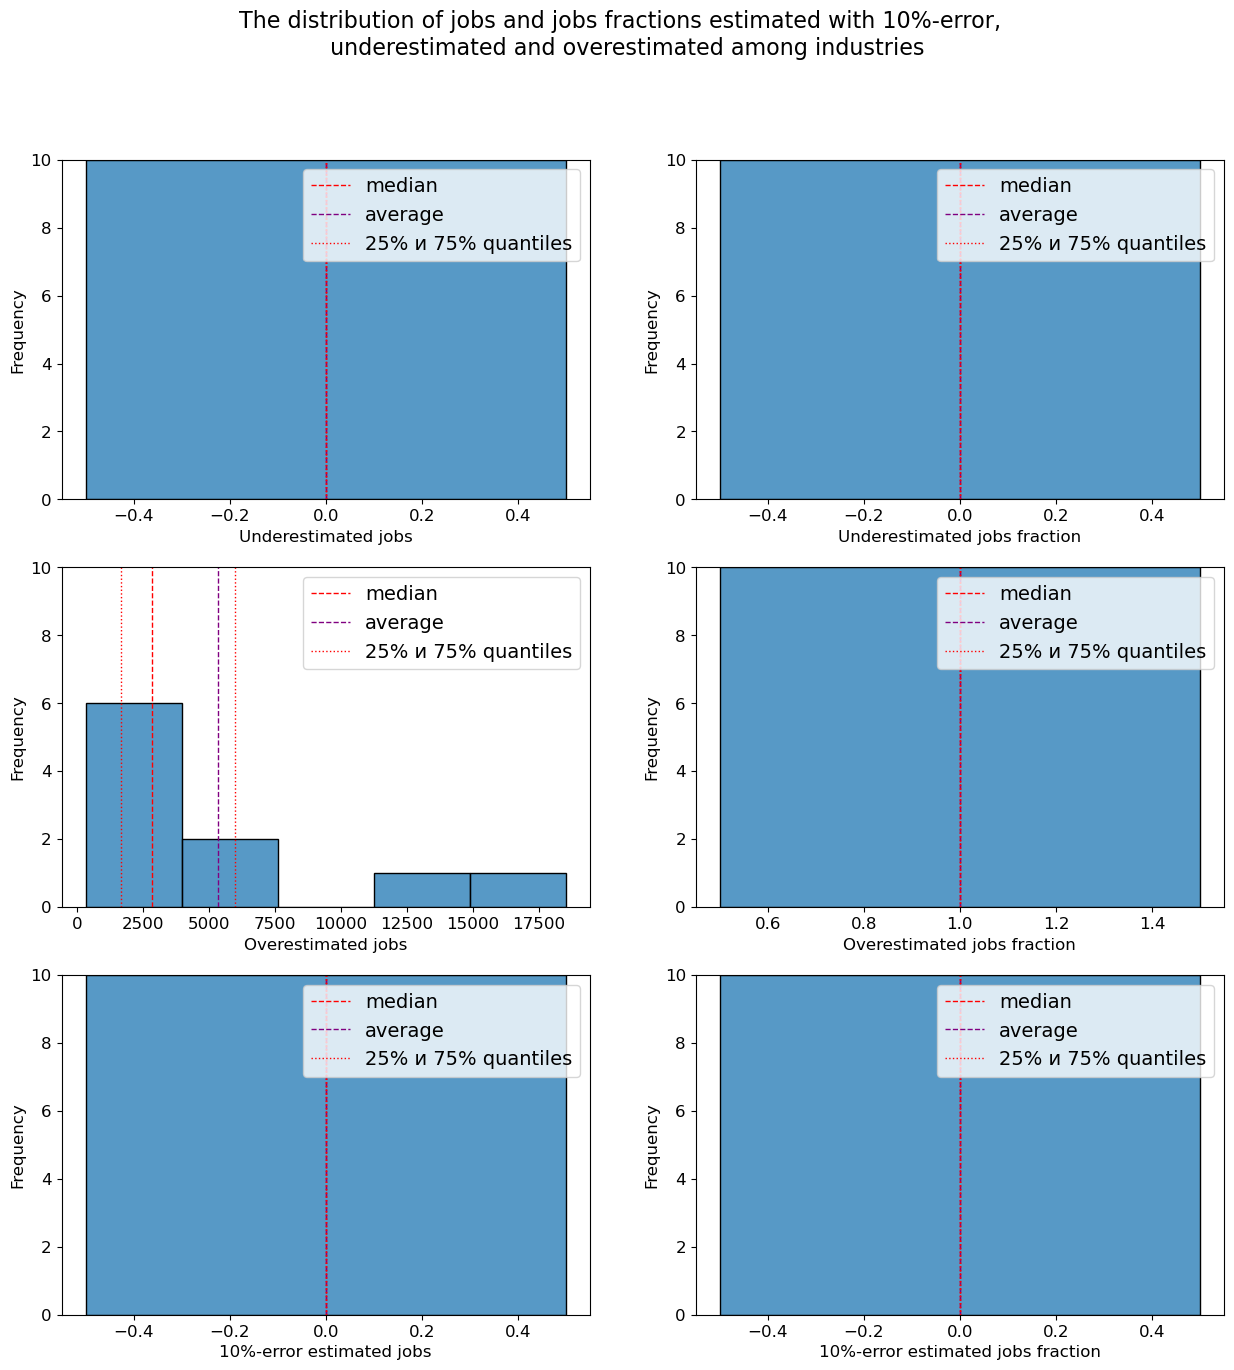

In [130]:
attribute_distribution_6plots(industries_stat,\
                              'The distribution of jobs and jobs fractions estimated with 10%-error, \n underestimated and overestimated among industries', \
                              10, 'UnderTime', 'Underestimated jobs', 'UnderTimeFrac', 'Underestimated jobs fraction', \
                                'OverTime', 'Overestimated jobs', 'OverTimeFrac', 'Overestimated jobs fraction',\
                             '10%error', '10%-error estimated jobs', '10%errorFrac', '10%-error estimated jobs fraction')

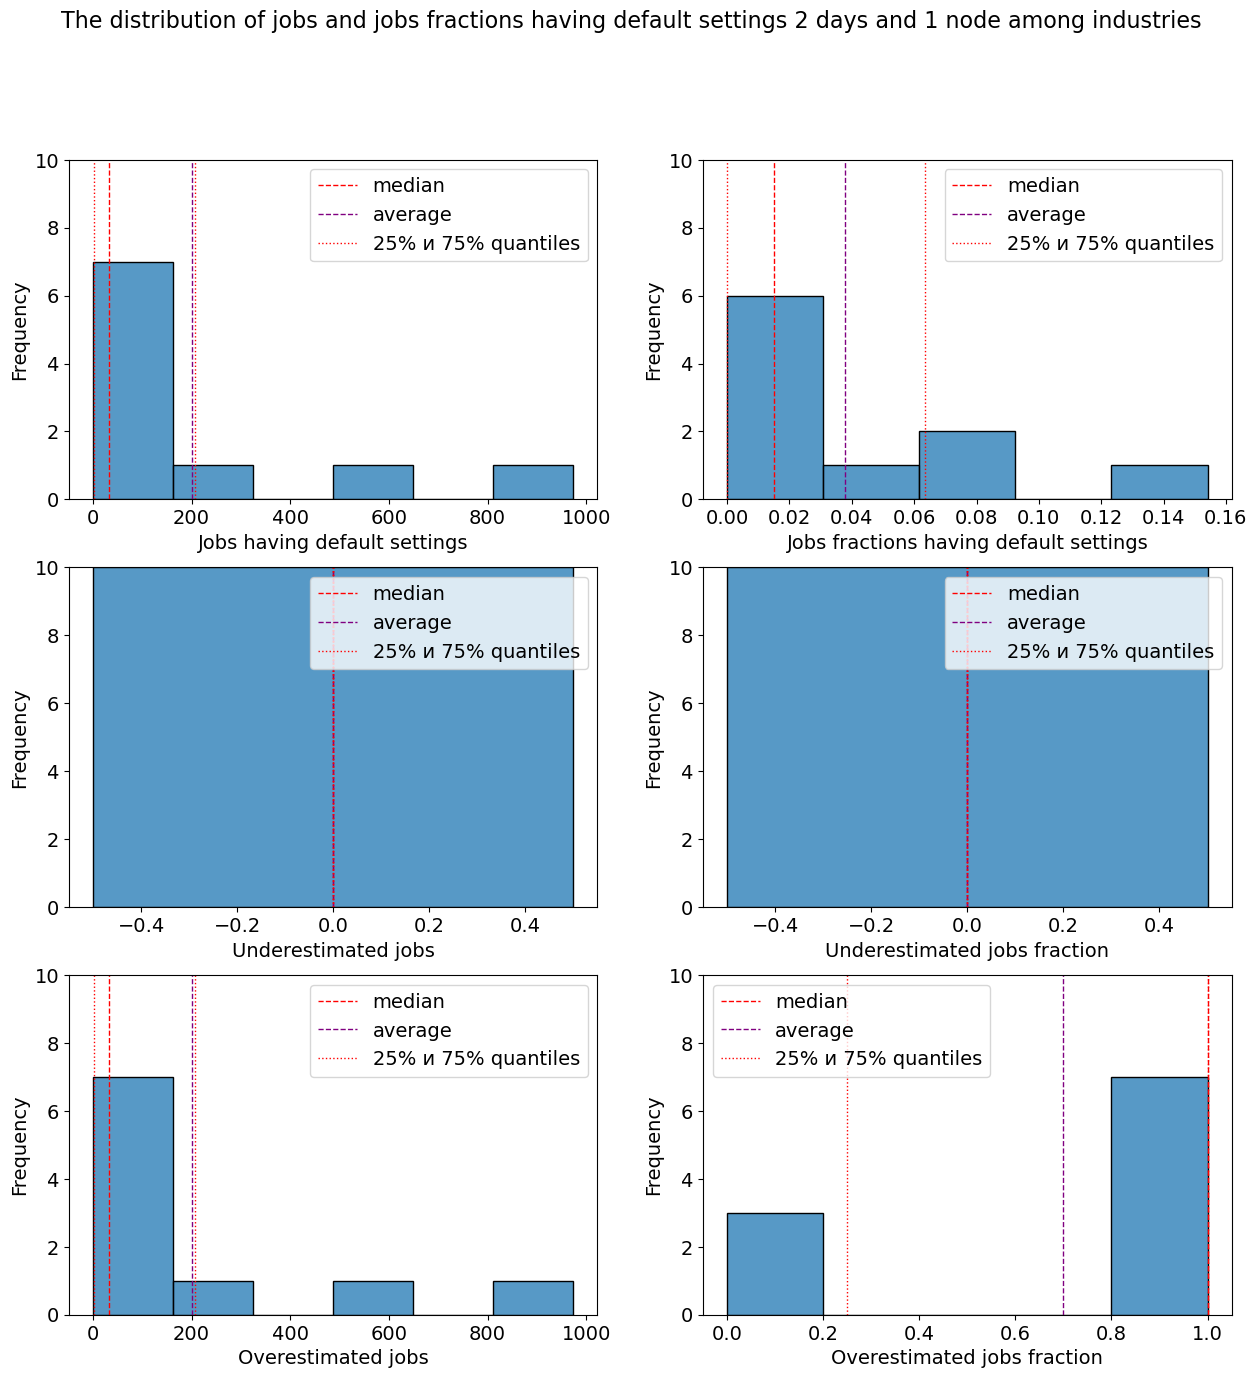

In [146]:
attribute_distribution_6plots(industries_stat, 'The distribution of jobs and jobs fractions having default settings 2 days and 1 node among industries', \
                              10, 'DefaultJobs', 'Jobs having default settings', 'DefaultFrac', \
                              'Jobs fractions having default settings', 'UnderJobs', 'Underestimated jobs',\
                              'UnderFrac', 'Underestimated jobs fraction', 'OverJobs', 'Overestimated jobs', 'OverFrac', \
                              'Overestimated jobs fraction')

In [57]:
industries = industries_stat[['Industry', 'UnderTimeFrac', 'OverTimeFrac']]
industries

Industry  UnderTimeFrac  OverTimeFrac
0                      IT       0.000000      0.961580
1            astrophysics       0.000000      0.990937
2          bioinformatics       0.000000      0.998758
3              biophysics       0.000000      0.963951
4              energetics       0.000000      0.996337
5              geophysics       0.000000      0.979025
6  mechanical engineering       0.000000      0.976623
7               mechanics       0.000000      0.930195
8                 physics       0.000446      0.845560
9            radiophysics       0.000000      0.957447

In [66]:
def industries_plot(industries, x, title):
    plot=sns.barplot(data=industries, x=x, y='Industry')
    plt.xlim(0,1)
    plt.title(label=title)
    plt.figure(figsize=(15, 10))
    plt.rcParams['font.size'] = '11'
    fig = plot.get_figure()
    fig.savefig('save_plot.png', bbox_inches='tight', dpi=100, facecolor='w', edgecolor='w')

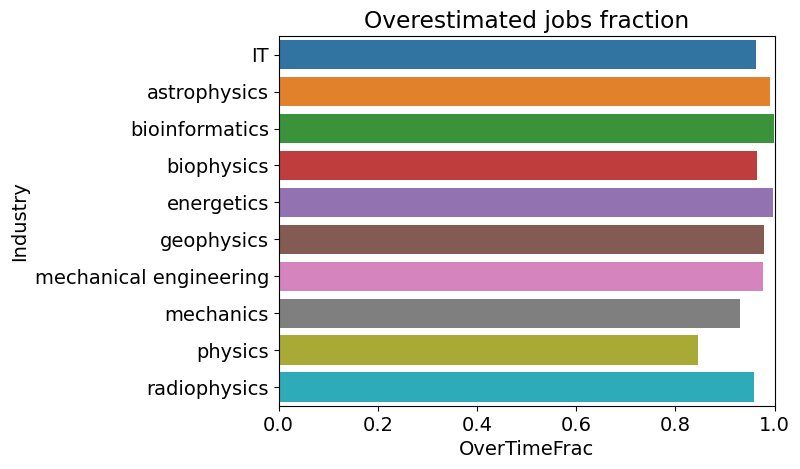

In [132]:
industries_plot(industries, 'OverTimeFrac', 'Overestimated jobs fraction')